<a href="https://colab.research.google.com/github/Sopralapanca/TwitterDataset-DM-Project/blob/main/DM_preparation_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for
describing the user and his/her behavior derived from the information collected from the
tweets.
Examples of indicators to be computed are:
1. How many tweets were published by the user?
2. How many tweets are published by the user in a given period of time?
3. Total number of tweets
4. Total number of likes and comments
5. Ratio between the number of tweets and the number of likes
6. Entropy of the user
7. Average length of the tweets per user
8. Average number of special characters in the tweets per user



# Importing the libraries and loading the dataset

In [ ]:
# Import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import calendar
import os
from os import path
from sys import getsizeof

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
# download data from google drive

if not path.exists('users.csv'):
  users_fileid = "16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR"
  tweets_fileid = "1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe"

  !gdown $users_fileid
  !gdown $tweets_fileid

Downloading...
From: https://drive.google.com/uc?id=16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR
To: /content/users.csv
100% 641k/641k [00:00<00:00, 93.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe
To: /content/tweets.csv
100% 1.86G/1.86G [00:19<00:00, 96.5MB/s]


In [ ]:
tweet_path = "tweets.csv"
user_path = "users.csv"

# max_rows is used to load a portion of the dataset

max_rows = 0
 
users_df = pd.read_csv(user_path) 

if max_rows != 0:
  tweets_df = pd.read_csv(tweet_path, nrows=max_rows)
else:
  tweets_df = pd.read_csv(tweet_path)

In [ ]:
tweets_df.index

RangeIndex(start=0, stop=13664696, step=1)

In [ ]:
tweets_df.columns

Index(['id', 'user_id', 'retweet_count', 'reply_count', 'favorite_count',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'text'],
      dtype='object')

# **Data Preparation**
---
In this section we deal with missing values and anomalies in the dataset so that we can later extract indicators

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

#### Assigning correct type to attribute

Here we start assigning to the columns analysed in the Understanding section their type, handling unconvertible values with inf and -inf.



In [ ]:
columns = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
    tweets_df[col]=pd.to_numeric(tweets_df[col], errors='coerce', downcast='integer')

tweets_df["created_at"]=pd.to_datetime(tweets_df["created_at"], errors='coerce', yearfirst=True)

users_df["created_at"]=pd.to_datetime(users_df["created_at"], errors='coerce', yearfirst=True)

In [ ]:
tweets_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# convert name of users_df to string
users_df['name'] = users_df['name'].astype('string')

# convert text of tweets_df to string
tweets_df['text'] = tweets_df['text'].astype('string')

#### Handling the right format

In the **Length distribution of the tweets** section we have detected un-normal tweets with a number of character over the permitted ceiling. Here we divide them in base of the rules before and after the update of the 2017.

In [ ]:
long__mask_2o17 = (tweets_df['text'].str.len() > 140 ) & (tweets_df['created_at'] < pd.to_datetime('2017-11-08'))
long__mask_others = (tweets_df['text'].str.len() > 280) & (tweets_df['created_at'] > pd.to_datetime('2017-11-08'))

print("Long tweets before the update: ", len(tweets_df[long__mask_2o17]))
print("Long tweets after the update:  ", len(tweets_df[long__mask_others]))

Long tweets before the update:  14535
Long tweets after the update:   243


There are several tweets that are exceeding the maximum cap of characters permitted. Right now we make use of the mask created above to select all the tweets exceeding the limit and consequently the users that have written them.
Among all of them we select the user with the majority of tweets over the cap and analyse his tweets.

In [ ]:
longer_than_possible_df = pd.concat([tweets_df[long__mask_2o17], tweets_df[long__mask_others]])
print("All the tweets that exceed the possible length of tweets", len(longer_than_possible_df))
longer_grouped = longer_than_possible_df.groupby('user_id')
#idx is the user_id with most tweets encoded wrongly
idx, max = longer_grouped.size().agg(['idxmax','max'])
print("There is a user with more than usual number of long tweets, it is the user with ID:", int(idx))

del long__mask_2o17, long__mask_others, longer_than_possible_df

All the tweets that exceed the possible length of tweets 14778
There is a user with more than usual number of long tweets, it is the user with ID: 252139342


In [ ]:
print_full(tweets_df.loc[tweets_df.user_id == int(idx)]['text'].iloc[:10])

340                                                                                                                                      à¹à¸à¸·à¹à¸­à¹à¸«à¸­à¸°.. à¸à¸µà¹à¸¡à¸´à¹à¸(à¹à¸¡à¹à¸à¸µà¹à¸à¹)à¸à¹à¸²à¸à¸¥à¸±à¸§à¸à¸µà¹à¸ªà¸¸à¸ OTL (à¸à¸²à¸£à¸§à¸°à¸à¸µà¹à¸ªà¸²à¸§)
8916                                                                                                                                                                       à¸à¸´à¸à¸à¸µà¹à¸à¸­à¸à¸à¸§à¸à¹à¸£à¸²à¹à¸ªà¸µà¸¢à¸à¸±à¸§à¹à¸¥à¹à¸§à¸à¸£à¸±à¸.. (à¸à¸²à¸à¹à¸«à¸à¸·à¹à¸­)
9366                                                                                        @lenes_frano (à¸à¸¡à¸«à¸²à¸¢à¹à¸à¸ªà¸±à¸à¸à¸±à¸à¸à¹à¸­à¸à¸à¸¸à¹à¸à¸à¸¶à¹à¸à¸¡à¸²à¸à¸§à¹à¸²à¸à¸­à¹à¸¥à¸à¸à¹à¹à¸¥à¹à¸§à¸à¸¶à¸à¸¥à¸à¹à¸à¸à¸¡à¸­à¸¢à¸¹à¹à¸à¹à¸§à¸¢à¸à¸±à¸)
14399                                                                                                                 

As we can see the majority of tweets seems to don't have any meaning, but it could be a problem of encoding. So we try to encode in *ISO-8859-1* and back in *UTF-8* in order to fix the issue, indeed the ISO-8859-1 is an encode used with foreign language, that contains a bigger range of characters.

In [ ]:
for text in tweets_df.loc[tweets_df.user_id == int(idx)]['text'].iloc[:10]:
  if not pd.isnull(text):
    converted_str = text.encode('ISO-8859-1').decode('utf-8')
    print(converted_str + " and it is long: " + str(len(converted_str)))

เชื่อเหอะ.. พี่มิ้น(แม่ชีเน่)น่ากลัวที่สุด OTL (คารวะพี่สาว) and it is long: 60
ซินนี่ของพวกเราเสียตัวแล้วครับ.. (ปาดเหงื่อ) and it is long: 44
@lenes_frano (จมหายไปสักพักก่อนพุ่งขึ้นมาคว้าคอเลนซ์แล้วดึงลงไปจมอยู่ด้วยกัน) and it is long: 77
@Grosmont โครตร้อนต่างหากละครับ -w- (แผ่ด้วย) and it is long: 45
@lenes_atsusa เพ้อเจ้อใหญ๋แล้วเลนซ์ ไปนอนกันดีกว่านะ เดี๋ยวผมพาไปส่ง = =" and it is long: 73
@lenes_atsusa (กอด) หยุดไม่ได้ฮะ T___T and it is long: 38
@jingkabellz @SaitoShane @EH_Leroi ช่าย.. โกหกไม่ดีนะฮะ (หัวเราะ) เพราะอย่างพอชเลนน่าจะเป็นปั๊กมากกว่ารอดไวเลอร์.. ใช่ไหมนะ? O_O and it is long: 128
@Eh_Tomson งื้อ (ลงนั่งด้วย เขยิบเข้าใกล้เนียนๆ) ขอโทษฮะ TT_TT and it is long: 62
@miosux เอเดรียน - คิดถึงผมทำไมครับ? เราไม่ได้เป็นอะไรกัน (หัวเราะ) and it is long: 67


Now the tweets have the correct format and as we have stated they don't exceed the ceiling of length. The issue can cover also other users coming from different areas, so it's better to encode properly the whole tweets_df. The following cell will do the job.

In [ ]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: x.encode('ISO-8859-1', errors='replace').decode('utf-8', errors='replace') if not pd.isnull(x) else x)

Now we can convert the column in the dataframe in the string type and count if there are still longer than normal tweets.

In [ ]:
tweets_df['text'] = tweets_df['text'].astype('string')

In [ ]:
final_mask1 = (tweets_df['text'].str.len() > 140 ) & (tweets_df['created_at'] < pd.to_datetime('2017-11-08'))
final_mask2 = (tweets_df['text'].str.len() > 280) & (tweets_df['created_at'] > pd.to_datetime('2017-11-08'))

print("Long tweets before the update: ", len(tweets_df[final_mask1]))
print("Long tweets after the update:  ", len(tweets_df[final_mask2]))

del final_mask1, final_mask2

Long tweets before the update:  1585
Long tweets after the update:   0


As we can see there are only few tweets with the impossible length, but we will not touch the remaining tweets because they can have a wrong 'created_at' value

### **Removing user_id in tweets dataframe that are not present in users dataframe**

In order to remove the tweets of users out of the dataset we merge the dataframes to assign to each user his tweets, then we drop users df columns.

In [ ]:
# remove rows on tweets dataframe that have user_id none
tweets_df.dropna(subset=['user_id'], inplace=True)

# in order to merge we convert user_id in int
tweets_df['user_id'] = tweets_df['user_id'].astype('int')

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13230801 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         int64         
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            string        
dtypes: datetime64[ns](1), float64(7), int64(1), string(1)
memory usage: 1.1 GB


In [ ]:
# merge the two dataframe, checking length of df after and before merging

users_df.rename(columns = {'id':'user_id'}, inplace = True)
users_df.rename(columns = {'created_at':'subscription_date'}, inplace = True)


print("Number of tweets before the merge:", len(tweets_df))
tweets_df = tweets_df.merge(users_df,on='user_id', how='inner')
print("Number of tweets after the merge:", len(tweets_df))

tweets_df.drop(columns=['name', 'lang', 'bot', 'subscription_date', 'statuses_count'], axis=1, inplace=True)

Number of tweets before the merge: 13230801
Number of tweets after the merge: 13229862


We have lost almost 1000 tweets, a negligible piece of the tweets dataset.

### **Removing duplicates and empty text**

In [ ]:
def find_and_remove_duplicates(df: DataFrame, dataframe_name):
    original_lenght = len(df)
    print(f"Len of {dataframe_name} before cleaning: {original_lenght}")

    df.drop_duplicates(inplace=True)
    new_lenght = len(df)

    count = original_lenght - new_lenght
    print(f"duplicates removed from {dataframe_name} file: \t{count}")
    print(f"Len of {dataframe_name} after cleaning: {new_lenght}")
    print(f"We have {round((count/original_lenght)*100,4)}% of duplicates in {dataframe_name} file\n")

find_and_remove_duplicates(tweets_df, "tweets_df")
find_and_remove_duplicates(users_df, "users_df")

Len of tweets_df before cleaning: 13229862
duplicates removed from tweets_df file: 	1952100
Len of tweets_df after cleaning: 11277762
We have 14.7553% of duplicates in tweets_df file

Len of users_df before cleaning: 11508
duplicates removed from users_df file: 	0
Len of users_df after cleaning: 11508
We have 0.0% of duplicates in users_df file



In [ ]:
# we decided to removes the rows that corresponds to empty text on tweets dataframe
tweets_df.dropna(subset=['text'], inplace=True)

### **Check if there are duplicated ids on tweets df and handle it**

In [ ]:
# print non unique row in the tweets dataframe
tweets_df[tweets_df['id'].duplicated() & tweets_df['id'].notnull()]["id"].astype(int)

69327       574164294280945664
258997      579432000072773632
315197              7674792957
377921      587657400674607104
503439      570813308145545216
                   ...        
13182743    459928211590086656
13190430    460878703635857408
13201526    476358378000633856
13202201    461622394138804160
13210064    460373867236556800
Name: id, Length: 506, dtype: int64

In [ ]:
# take one of the ids and show its tweets
tweets_df.loc[tweets_df["id"]==481756826439286784]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
8668469,4.817568e+17,2233856637,0.0,0.0,0.0,0.0,0.0,1.0,2019-06-27 11:12:32,@Dabizdiverxo yo prefiere bebermelo... Supongo...
12265058,4.817568e+17,614258591,2.0,0.0,5.0,0.0,0.0,0.0,2019-06-27 11:12:32,Chi va piano va sano e va lontano. Ma probabil...


As we can see there are two tweets with the same tweet id but different user id, text and counters

In [ ]:
 # we decided to replace a duplicated id with a NaN, later on these NaN values will be filled with an unique generated id
tweets_df.loc[(tweets_df['id'].duplicated() & tweets_df['id'].notnull()), "id"] = np.nan 

Check duplicated ids on users dataframe

In [ ]:
# print non unique row in the users dataframe
users_df[users_df['user_id'].duplicated() & users_df['user_id'].notnull()]["user_id"].astype(int)

# no duplicated in users dataframe

Series([], Name: user_id, dtype: int64)

### **Handling of anomalies**

In this section we handle anomalies identified in the understanding phase.

#### Cleaning of counter type fields

As we can see from the graphs made in the understanding notebook in the counter type fields there are very high values that clearly are anomalies.
To address this problem we will iterate on columns, identify outliers and substitute outliers with NaN.
NaN will be substituted with mean per user.

In [ ]:
# substitute negative values
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

for col in columns:
  tweets_df[col].mask(tweets_df[col].lt(0),0, inplace=True)

In [ ]:
# Since there are very high values first of all we print the data at a specific quantile
quantile_list = [0.75, 0.90, 0.95, 0.97, 0.99,0.995, 0.999, 0.9999, 0.99999, 0.999999]

for col in columns:
  print(tweets_df[col].quantile(quantile_list))
  print()

0.750000    1.000000e+00
0.900000    2.600000e+01
0.950000    4.580000e+02
0.970000    1.517000e+03
0.990000    7.485000e+03
0.995000    1.761537e+04
0.999000    1.164896e+05
0.999900    3.932630e+05
0.999990    3.350059e+06
0.999999    1.891735e+10
Name: retweet_count, dtype: float64

0.750000    0.000000e+00
0.900000    0.000000e+00
0.950000    0.000000e+00
0.970000    0.000000e+00
0.990000    0.000000e+00
0.995000    0.000000e+00
0.999000    1.000000e+00
0.999900    2.300000e+01
0.999990    7.960802e+03
0.999999    1.317907e+37
Name: reply_count, dtype: float64

0.750000    0.000000e+00
0.900000    1.000000e+00
0.950000    2.000000e+00
0.970000    3.000000e+00
0.990000    7.000000e+00
0.995000    1.200000e+01
0.999000    4.600000e+01
0.999900    3.288000e+03
0.999990    2.266100e+04
0.999999    8.257937e+09
Name: favorite_count, dtype: float64

0.750000    0.000000e+00
0.900000    1.000000e+00
0.950000    1.000000e+00
0.970000    2.000000e+00
0.990000    3.000000e+00
0.995000    4.0

In [ ]:
# then we choose a quantile looking at the values and we substitute all the values greater than the 
# quantile with NaN

# based on the boxplots image on understanding notebook 
# and the printed percentile above we choose:
# retweet count   0.999900
# reply count     0.999990
# favorite count  0.999990
# num_hashtags    0.999990
# num_urls        0.999900
# num_mentions    0.999900

tmp = ["retweet_count", "num_urls", "num_mentions"]
for elem in tmp:
  tweets_df[elem].where(tweets_df[elem] <= tweets_df[elem].quantile(0.999900), np.nan, inplace=True)

tmp = ["reply_count", "favorite_count", "num_hashtags"]

for col in tmp:
  tweets_df[col].where(tweets_df[col] <= tweets_df[col].quantile(0.999990), np.nan, inplace=True)

In [ ]:
tweets_df.describe()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.059931e+07,1.086071e+07,1.045008e+07,1.045086e+07,1.032346e+07,1.032318e+07,1.045067e+07,1.045084e+07
mean,4.755295e+17,8.303962e+08,4.934116e+02,5.846484e-02,1.292587e+00,1.887734e-01,1.643135e-01,5.268640e-01
std,1.615231e+17,8.522354e+08,6.735149e+03,1.405089e+01,7.279808e+01,3.161300e+00,3.765967e-01,8.140293e-01
min,3.460000e+02,6.780330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.646363e+17,2.325471e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.250204e+17,4.680735e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.774528e+17,1.226238e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.999974e+17,3.164942e+09,3.932630e+05,7.900000e+03,2.266100e+04,2.481000e+03,3.000000e+00,1.100000e+01


#### Clean the language column in the users dataframe

For the language column we analyzed a few tweets and decided to assign them the English value. We then transformed all the strings into a lower case in order to combine languages such as "en-gb" and "en-GB". The "xx-lc" language does not exist and has been transformed into "en"

In [ ]:
users_df['lang'] = users_df['lang'].str.lower() # to lower case

users_df['lang'] = users_df['lang'].replace("select language...", "en")
users_df['lang'] = users_df['lang'].replace("xx-lc", "en")

In [ ]:
print(users_df["lang"].unique())

['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-au' 'da' 'ar' 'zh-cn' 'pl' 'el' 'fil' 'sv']


#### Cleaning the wrong dates

Our assumption is since the ID of tweets is an incremental number, older tweets will have a smaller ID and the younger a bigger one. Following this assumption we will assign to each day a median ID and then substitute the incorrect date with the nearest ID day.

In [ ]:
from datetime import datetime

today = pd.to_datetime("today")     # Tweets cannot be written in the future!
min = pd.to_datetime("2006-03-21")  # Neither before the creation of Twitter :D

mask_datesOK = (tweets_df['created_at'] < today) & (tweets_df['created_at'] > min)  # We create a mask to divide in wrong and right dates

id_calendar = tweets_df[mask_datesOK][['id', 'created_at']].copy()
id_calendar['created_at'] = id_calendar['created_at'].dt.strftime('%Y-%m-%d')       # Converting the datetimes in just YY - mm - dd
by_date_df = id_calendar.groupby('created_at', as_index=False).median()             # In order to group the tweets in days and extrapolate the median ID for each day

del id_calendar # Free some RAM ...

by_date_df["created_at"]=pd.to_datetime(by_date_df["created_at"], errors='coerce', yearfirst=True)
print("Number of tweets with wrong dates: ", len(tweets_df[~mask_datesOK]))

Number of tweets with wrong dates:  97239


As we can see in the frame by_date we have each day from the correct tweets and his reppresenting ID.

In [ ]:
users_subscription = users_df[users_df['user_id'].isin(tweets_df[~mask_datesOK]['user_id'])].copy()
users_subscription.drop(columns=['name', 'lang', 'bot', 'statuses_count'], inplace=True)            # Taking just the columns that we need

print("User with tweets dated uncorrectly subcribed first ", users_subscription['subscription_date'].min())
print("User with tweets dated uncorrectly subcribed last  ", users_subscription['subscription_date'].max())

tweets_grouped = tweets_df[~mask_datesOK].groupby('user_id')

print("Frame with user subscriptions            ", len(users_subscription))
print("Frame with wrong tweets grouped by users ", len(tweets_grouped))

User with tweets dated uncorrectly subcribed first  2012-01-24 01:57:38
User with tweets dated uncorrectly subcribed last   2018-09-23 00:40:35
Frame with user subscriptions             236
Frame with wrong tweets grouped by users  236


As we expected the data grouped and the one SELECTed from the user_df have the same length. Now we can proceed to substitute the dates with the one assigned from the correct one IDs. As a base we use the subscription date of the user that have writte the tweet.

In [ ]:
# In order to shrink computation time we take advantage of the function map,
# to avoid substitute values inside the 2nd for loop
for user, frame in tweets_grouped:
  sub_date = users_subscription[users_subscription['user_id']==user]['subscription_date'].values[0] # The day of subscription of the user with incorrect dated tweets
  user_mask = (by_date_df['created_at'] > sub_date)
  good_dates = by_date_df[user_mask] # Taking the dates compatible with the subscription 
  
  for row_index, row in frame.iterrows():
    right_date = good_dates.iloc[(row['id'] - good_dates['id']).abs().argsort()[:1]]['created_at'].values[0]         

    ts = (right_date - np.datetime64('1970-01-01T00:00')) / np.timedelta64(1, 's') # Conversion of numpy.datetime[64] in timeStamp
    right_dt = datetime.utcfromtimestamp(ts) # Conversion of timeStamp in datetime
    right_dt = right_dt.replace(hour = row['created_at'].hour, 
                     minute = row['created_at'].minute, 
                     second = row['created_at'].second)
    tweets_df.at[row_index, 'created_at'] = right_dt

try: 
  del tweets_grouped, sub_date, user_mask, good_dates, right_date
except:
  print("The variable is not instatiated")

## Filling missing values on tweets and users dataframe

Here we fill the missing values with coherent one, this methodology is specialized for each column for obvious reason.

**num_hashtags**

Here we take the tweets without the number of hashtag and through a regex we search for piece of text that starts for **#**.

In [ ]:
# use regex to find number of hashtags on a text and fill nan values

import re


regex_hashtag = "#[a-zA-Z0-9_]+" # or '#\w+'

m = tweets_df['num_hashtags'].isna()

tweets_df.loc[m, 'num_hashtags'] = tweets_df.loc[m, 'text'].str.count(regex_hashtag)

In [ ]:
tweets_df['num_hashtags'].isnull().values.any()

False

**num_urls**

Here we take the tweets without the number of urls and through a regex we search for piece of text that starts for **https** or **www** .

In [ ]:
regex_url = "(https?:\/\/)?(www[.])?(t)\.co\/([a-zA-Z0-9_-]*)\/?"

m = tweets_df['num_urls'].isna()

tweets_df.loc[m, 'num_urls'] = tweets_df.loc[m, 'text'].str.count(regex_hashtag)

In [ ]:
tweets_df['num_urls'].isnull().values.any()

False

**retweet, reply count, favorite count, num mentions.**

This columns are substituted with the same method because there are no other way doable, so the mean is taken (since outliers are been removed this is not affected) and replace missing values.

In [ ]:
# To avoid removing important records from the dataset 
# we decide, after removing the outliers, to compute the mean per user of these counters
# and replace NaN values with the the mean per user

columns = ["retweet_count", "reply_count", "favorite_count", "num_mentions"] 

for col in columns:
  tweets_df[col].fillna(tweets_df.groupby('user_id')[col].transform('mean').astype(int), inplace=True)

**tweets_id**

The tweets ID missing are simply subsituted with a forward fill, the precedent ID will decide the ID of the missing one. 

In [ ]:
# we decided to replace the values for the ids in the tweets dataset by creating new unique ids
tweets_df["id"] = tweets_df["id"].fillna(method="ffill")
tweets_df.set_index("id")

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
5.093540e+17,327746321,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
5.238919e+17,327746321,0.0,0.0,0.0,0.0,1.0,0.0,2019-10-21 17:42:10,Read the Biography of Don Henley http://t.co/...
5.282026e+17,327746321,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-02 15:11:22,Don't tell me where your priorities are. Show ...
5.301192e+17,327746321,0.0,0.0,0.0,0.0,1.0,0.0,2019-11-07 22:07:20,Learn About the Great Music of Bill Justis ht...
5.204351e+17,327746321,0.0,0.0,0.0,0.0,1.0,0.0,2019-10-12 04:46:17,Do you love James Bond? Check out these cool ...
...,...,...,...,...,...,...,...,...,...
3.467543e+09,67828913,0.0,0.0,0.0,0.0,0.0,0.0,2014-08-24 06:08:32,off to bed
3.284113e+17,1381744988,0.0,0.0,0.0,0.0,0.0,0.0,2018-04-30 07:32:17,End of test :(͡๏̯͡๏) (͡๏̯͡๏) (͡๏̯͡๏) (͡๏̯͡๏) (...
2.244227e+17,97859473,0.0,0.0,0.0,0.0,1.0,0.0,2017-07-17 08:38:34,http://t.co/6j63gV95


**statuses_count**

Since the analysis in the Understanding Notebook have detected that only the non bot users have nan values here we will compute the mean only of them, to keep a coherent distribution among the bot label.

In [ ]:
# On data understanding notebook we saw that only non bot have nan values on statuses count feature 
# so we compute the mean only for non bot and we substitute it for the nan values
average = users_df.loc[users_df['bot']==0]['statuses_count'].mean().astype(int)
users_df['statuses_count' ].fillna(value=average, inplace=True)

**name**

In [ ]:
# there is one NaN values in name feature on user dataframe that we substitute with the string "UNKNOWN"
users_df['name'].fillna(value="UNKNOWN", inplace=True)

## Final Check

In [ ]:
# check if we still have nan

for col in tweets_df:
  print(f"{col} have NaN: {tweets_df[col].isna().values.any()} : {tweets_df[col].isna().sum()}")

print()


for col in users_df:
  print(f"{col} have NaN: {users_df[col].isna().values.any()} : {users_df[col].isna().sum()}")  

id have NaN: False : 0
user_id have NaN: False : 0
retweet_count have NaN: False : 0
reply_count have NaN: False : 0
favorite_count have NaN: False : 0
num_hashtags have NaN: False : 0
num_urls have NaN: False : 0
num_mentions have NaN: False : 0
created_at have NaN: False : 0
text have NaN: False : 0

user_id have NaN: False : 0
name have NaN: False : 0
lang have NaN: False : 0
bot have NaN: False : 0
subscription_date have NaN: False : 0
statuses_count have NaN: False : 0


In [ ]:
#after eliminating all the NaN we can assign correct type to the columns

columns = ["id", "user_id", "retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 
for col in columns:
  tweets_df[col] = tweets_df[col].astype(int)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10860709 entries, 0 to 13229861
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   user_id         int64         
 2   retweet_count   int64         
 3   reply_count     int64         
 4   favorite_count  int64         
 5   num_hashtags    int64         
 6   num_urls        int64         
 7   num_mentions    int64         
 8   created_at      datetime64[ns]
 9   text            string        
dtypes: datetime64[ns](1), int64(8), string(1)
memory usage: 1.1 GB


In [ ]:
tweets_df.describe()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07
mean,4.755511e+17,8.303962e+08,4.932719e+02,5.757258e-02,1.283392e+00,1.872202e-01,1.640235e-01,5.120221e-01
std,1.614480e+17,8.522354e+08,6.613825e+03,1.378363e+01,7.120728e+01,3.084772e+00,3.860425e-01,8.051843e-01
min,3.460000e+02,6.780330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.646533e+17,2.325471e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.250046e+17,4.680735e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.774314e+17,1.226238e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.999974e+17,3.164942e+09,3.932630e+05,7.900000e+03,2.266100e+04,2.481000e+03,2.800000e+01,1.100000e+01


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11508 non-null  int64         
 1   name               11508 non-null  string        
 2   lang               11508 non-null  object        
 3   bot                11508 non-null  int64         
 4   subscription_date  11508 non-null  datetime64[ns]
 5   statuses_count     11508 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), string(1)
memory usage: 629.3+ KB


In [ ]:
users_df.describe()

,user_id,bot,statuses_count
count,1.150800e+04,11508.000000,11508.000000
mean,1.274517e+09,0.531456,6082.836201
std,9.354135e+08,0.499031,18768.969041
min,6.780330e+05,0.000000,0.000000
25%,4.663594e+08,0.000000,42.000000
50%,1.128643e+09,1.000000,71.000000
75%,2.357148e+09,1.000000,4318.000000
max,3.164942e+09,1.000000,399555.000000


# Indicators


#### Indicator 1 : How many tweets were published by the user?

This indicator is the simple sum of all the tweets written by each user.

In [ ]:
grouped = tweets_df.groupby('user_id')

number_of_tweets = grouped['favorite_count'].count()
for user_id in number_of_tweets.index:
    users_df.loc[users_df['user_id'] == user_id, 'number_of_tweets'] = number_of_tweets[user_id]

users_df['number_of_tweets'] = users_df['number_of_tweets'].astype(int)


#### Indicator 2 : How many tweets are published by the user in a given period of time

Here we are selecting the number of tweets written in a range of time, here we select the years with most of the tweets written the 2019 and 2020.

In [ ]:
grouped = tweets_df.groupby('user_id')
result = grouped.apply(lambda x: x['created_at'].dt.year.value_counts().sort_index().to_dict())
for user_id in result.index:
    tweets_2019 = result[user_id].get(2019, 0)
    tweets_2020 = result[user_id].get(2020, 0)
    users_df.loc[users_df['user_id'] == user_id, 'tweets_2019'] = tweets_2019
    users_df.loc[users_df['user_id'] == user_id, 'tweets_2020'] = tweets_2020

users_df['tweets_2019'] = users_df['tweets_2019'].astype(int)
users_df['tweets_2020'] = users_df['tweets_2020'].astype(int)

#### Indicator 3: favorite_count
Indicators on favorite_count
1.   Total number of *likes* received by the user
2.   Max number of *likes* received by the user
3.   Mean number of *likes* received by the user per tweet



In [ ]:
grouped = tweets_df.groupby('user_id')

likes_sum = grouped['favorite_count'].sum()
likes_max = grouped['favorite_count'].max()
likes_mean = grouped['favorite_count'].mean()

for user_id in likes_sum.index:
    likes_sum_for_this_user = likes_sum[user_id]
    likes_mean_for_this_user = likes_mean[user_id]
    likes_max_for_this_user = likes_max[user_id]

    users_df.loc[users_df['user_id'] == user_id, 'likes_sum'] = likes_sum_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'likes_mean'] = likes_mean_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'likes_max'] = likes_max_for_this_user


users_df['likes_sum'] = users_df['likes_sum'].astype(int)
users_df['likes_max'] = users_df['likes_max'].astype(int)
users_df['likes_mean'] = users_df['likes_mean'].astype(int)

#### Indicator 4: Ratio between the number of tweets and the number of likes

This indicator is useful to highlight the importance received by each tweet written by a user, it's a sort of ratio for the popularity received with the likes.

In [ ]:
grouped = tweets_df.groupby('user_id')

likes_sum = grouped['favorite_count'].sum()
number_of_tweets = grouped['favorite_count'].count()

for user_id in likes_sum.index:
    likes_sum_for_this_user = likes_sum[user_id]
    number_of_tweets_for_this_user = number_of_tweets[user_id]

    ratio_num_likes_and_num_tweets = likes_sum_for_this_user/number_of_tweets_for_this_user

    users_df.loc[users_df['user_id'] == user_id, 'ratio_num_likes_and_num_tweets'] = ratio_num_likes_and_num_tweets

#### Indicator 5 : Time delta in sec

This indicator provides the average time passed between the publishing of two consecutive tweets by the same user expressed in seconds

In [ ]:
uniques_id = users_df['user_id'].unique()
grouped = tweets_df.groupby('user_id')

for user_id in uniques_id:
    dates = grouped.get_group(user_id)["created_at"].sort_values()
    if (len(dates) < 2):
        users_df.loc[users_df['user_id'] == user_id, "mean_time_delta_sec"] = 99999999999
        continue

    mean_delta = 0
    min_delta = 0

    for first_date, second_date in zip(dates, dates[1:]):
        diff = (second_date - first_date).total_seconds()
        if min_delta<diff:
            min_delta = diff
        mean_delta += diff
    
    time_delta_sec = mean_delta / (len(dates) - 1)
    users_df.loc[users_df['user_id'] == user_id, "mean_time_delta_sec"] = time_delta_sec
    users_df.loc[users_df['user_id'] == user_id, "min_delta_sec"]  = min_delta

users_df['min_delta_sec'] = users_df['min_delta_sec'].fillna(99999999999)

#### Indicator 6: Average and max length of the tweets per user

The indicator below show the number of character written.


1.   Mean of the *number of character* written.
2.   Max *number of character* written in a tweet.



In [ ]:
grouped = tweets_df.groupby('user_id')
mean_len = grouped['text'].apply(lambda x: x.str.len().mean())
max_len = grouped['text'].apply(lambda x: x.str.len().max())

for user_id in mean_len.index:
    value_mean = mean_len[user_id]
    value_max = max_len[user_id]
    users_df.loc[users_df['user_id'] == user_id, 'mean_length'] = value_mean
    users_df.loc[users_df['user_id'] == user_id, 'max_length'] = value_max

del grouped, mean_len, max_len

users_df['max_length'] = users_df['max_length'].astype(int)
users_df['mean_length'] = users_df['mean_length'].astype(int)

#### Indicator 7: Total number of special characters in the tweets per user and sum of the lenth of tweets per user

In [ ]:
set_of_special_characters = [".",";",":","!","?","-",",","_","/",
                             "(",")","[","]","{","}","|","\\","$",
                             "%","^","&","*","~","`","'","\"",
                             "<",">","=","+","-","—","–","…",
                             "’","‘","“","”","—", "Ã","©","®","™","â","€","™","¢","£",
                             "¨","§","¶","•","ª","º","¹","²","³","¼","½","¾","¿","×","÷",
                             "Ø","ø","Æ","æ","ß","Þ","þ","Ð","ð","Ý","ý","ÿ","Ù","ù","Ú",
                             "¡","¤","¦","¥","¦","¬","¯","±","µ","¶","·","¸","¹","º","»","¼","½","¾","¿","×","÷",
                             "Û","û","Ý","ý","ÿ","Ÿ","Œ","œ","Š","š","Ÿ","Ž","ž","ƒ",
                             "Ç","ç","Ê","ê","Ë","ë","Ì","ì","Í","í","Î",
                             "î","Ï","ï","Ñ","ñ","Ô","ô","Õ","õ","Û","û","Ü","ü"]

grouped = tweets_df.groupby('user_id')
combine = lambda x: ''.join(filter(None, x))
count_special_characters = lambda x: sum(map(x.count, set_of_special_characters))
combined = grouped['text'].apply(combine)
number_special_chars_per_users = combined.apply(count_special_characters)

In [ ]:
for user_id in number_special_chars_per_users.index:
    number_special_chars_for_this_user = number_special_chars_per_users[user_id]
    len_all_tweets_for_this_user = len(combined[user_id])
    users_df.loc[users_df['user_id'] == user_id, 'sum_number_of_special_chars'] = number_special_chars_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'sum_len_all_tweets'] = len_all_tweets_for_this_user
    

del set_of_special_characters, grouped, combine, count_special_characters, combined, number_special_chars_per_users

users_df['sum_number_of_special_chars'] = users_df['sum_number_of_special_chars'].astype(int)
users_df['sum_len_all_tweets'] = users_df['sum_len_all_tweets'].astype(int)

#### Custom Indicator 8 : Mean, Max for num_hashtag

The number of hashtags permits to understand how many account are pointed by the user, this can be useful trying to carry out the network of friends or the spam that an user can do.

In [ ]:
grouped = tweets_df.groupby('user_id')

num_hashtags_mean = grouped['num_hashtags'].mean()
num_hashtags_max = grouped['num_hashtags'].max()

for user_id in num_hashtags_mean.index:
    num_hashtags_mean_for_this_user = num_hashtags_mean[user_id]
    num_hashtags_max_for_this_user = num_hashtags_max[user_id]

    users_df.loc[users_df['user_id'] == user_id, 'num_hashtags_mean'] = num_hashtags_mean_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'num_hashtags_max'] = num_hashtags_max_for_this_user
    
del grouped, num_hashtags_mean, num_hashtags_max

users_df['num_hashtags_mean'] = users_df['num_hashtags_mean'].astype(int)
users_df['num_hashtags_max'] = users_df['num_hashtags_max'].astype(int)

#### Custom Indicator 9 : Mean, Max for num_urls

Similar to the number of hashtags for the spamming purposes but can also indocate the pages that can be connected to an user, it's more easy that a spammer account make use of links to point out phishing pages or advertisement rather than a common user.

In [ ]:
grouped = tweets_df.groupby('user_id')

num_urls_mean = grouped['num_urls'].mean()
num_urls_max = grouped['num_urls'].max()

for user_id in num_urls_mean.index:
    num_urls_mean_for_this_user = num_urls_mean[user_id]
    num_urls_max_for_this_user = num_urls_max[user_id]

    users_df.loc[users_df['user_id'] == user_id, 'num_urls_mean'] = num_urls_mean_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'num_urls_max'] = num_urls_max_for_this_user
    
del grouped, num_urls_mean, num_urls_max

users_df['num_urls_mean'] = users_df['num_urls_mean'].astype(int)
users_df['num_urls_max'] = users_df['num_urls_max'].astype(int)

#### Custom Indicator 10 : Mean, Max for num_mentions

The mention in Twitter plays an important role, this is equal of the old fashion tags and can be used in both tweets or comments. An average user uses this rather than hashtags or urls, so we aspect to see a major number of hashtags in common users.

In [ ]:
grouped = tweets_df.groupby('user_id')

num_mentions_mean = grouped['num_mentions'].mean()
num_mentions_max = grouped['num_mentions'].max()

for user_id in num_mentions_mean.index:
    num_mentions_mean_for_this_user = num_mentions_mean[user_id]
    num_mentions_max_for_this_user = num_mentions_max[user_id]

    users_df.loc[users_df['user_id'] == user_id, 'num_mentions_mean'] = num_mentions_mean_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'num_mentions_max'] = num_mentions_max_for_this_user
    
del grouped, num_mentions_mean, num_mentions_max

users_df['num_mentions_mean'] = users_df['num_mentions_mean'].astype(int)
users_df['num_mentions_max'] = users_df['num_mentions_max'].astype(int)

#### Custom Indicator 11 : Number of retweets

Since Twitter uses the letters **RT** to indicate a tweets that have been retweeted, we can use a regex to find them and count the number of retweet made by each user. The retweets are a copy of a tweet with some comments attached, we think that the normal users make use of this to make a point or to express a personal opinion.

In [ ]:
tweets_df['is_retweet'] = tweets_df['text'].str.contains('^RT @[\w_]+:', regex=True)
print(tweets_df['is_retweet'].value_counts())

False    8862276
True     1998433
Name: is_retweet, dtype: Int64


In [ ]:
grouped = tweets_df.groupby('user_id')

for i,(val, user_number_of_retweets) in enumerate(grouped['is_retweet'].value_counts().iteritems()):
  user_id = val[0]
  user_is_a_retweet = val[1]

  if user_is_a_retweet:
    users_df.loc[users_df['user_id'] == user_id, 'user_number_of_retweets'] = user_number_of_retweets

users_df['user_number_of_retweets'] = users_df['user_number_of_retweets'].fillna(0)
users_df['user_number_of_retweets'] = users_df['user_number_of_retweets'].astype(int)

del grouped

#### Custom Indicator 12: Number of consecutive day writing tweets

According to our researches we knew that there are bots that tweet after a command or a question, this kind of bots, like the Telegram ones, offer a service to the community so we think that they can have a nice streak of consecutive active days. Indeed this indicator wants to count the number of consecutive days in which an user have tweeted.

In [ ]:
tweets_df['Newkey']=tweets_df.created_at.diff().dt.days.ne(1).cumsum()
grouped = tweets_df.groupby(['user_id','Newkey'])['created_at'].count()

tweets_df.drop(columns='Newkey', inplace = True)

In [ ]:
temp_df = pd.DataFrame()
temp_df['consecutive_days'] = grouped.groupby('user_id').max()
temp_df.reset_index()
users_df = users_df.merge(temp_df, on='user_id')
del grouped, temp_df

#### Custom indicator 13: Sum and Max of duplicate tweets per user

In this custom indicator we count how many times each tweet appears on tweets dataframe in search for duplicated tweets. We associate this counter to all the users who made that tweet. This indicator can be useful to understand if a tweet is a quote and the importance of the quote among the community. Maybe can be even better if we assign at each user a flag for being the first to write the quote.

In [ ]:
df_u_sum = tweets_df.assign(counter=tweets_df["text"].map(tweets_df["text"].value_counts()))[
    ["user_id", "counter"]
].groupby("user_id", as_index=False).sum()

In [ ]:
df_u_sum.rename(columns={"counter": "sum_duplicate_tweets"}, inplace=True)
users_df = users_df.merge(df_u_sum, how="inner", on="user_id")

In [ ]:
df_u_max = tweets_df.assign(counter=tweets_df["text"].map(tweets_df["text"].value_counts()))[
    ["user_id", "counter"]
].groupby("user_id", as_index=False).max()

In [ ]:
df_u_max.rename(columns={"counter": "max_duplicate_tweets"}, inplace=True)
users_df = users_df.merge(df_u_max, how="inner", on="user_id")


del df_u_max, df_u_sum

#### Custom indicator 14: Min, Max and Average tweets per hours
Here we count how many tweets the user has made in the range of 1 hour, then we save the minimum, the maximum and the mean.

In [ ]:
tweets_df.set_index(pd.to_datetime(tweets_df['created_at']), inplace=True)

out = tweets_df.groupby('user_id').resample('1h')[['id']].count().replace(0, np.nan).dropna()


In [ ]:
out_mean = out.groupby('user_id').mean().rename(columns={'id':'average_tweets_per_h'})
out_max = out.groupby('user_id').max().rename(columns={'id':'max_tweets_per_h'})
out_min = out.groupby('user_id').min().rename(columns={'id':'min_tweets_per_h'})

In [ ]:
users_df = users_df.merge(out_mean, how="inner", on="user_id")
users_df = users_df.merge(out_min, how="inner", on="user_id")
users_df = users_df.merge(out_max, how="inner", on="user_id")

users_df['average_tweets_per_h'] = users_df['average_tweets_per_h'].astype(int)
users_df['max_tweets_per_h'] = users_df['max_tweets_per_h'].astype(int)
users_df['min_tweets_per_h'] = users_df['min_tweets_per_h'].astype(int)

tweets_df.reset_index(drop=True, inplace=True)


#### Indicator 15: Entropy of the user

Here we calculate the entropy passing between each tweet writte by a user, in such a way we can see the frequency of tweets written.

In [ ]:
from scipy.stats import entropy
from math import log, e

def calculate_entropy(column):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    return -(vc * np.log(vc)/np.log(e)).sum()

In [ ]:
from scipy.stats import entropy

def calculate_entropy_for_this_feature(feature): #must be a tweets_df feature
  if feature not in tweets_df.columns:
    raise BaseException("feature must be a column of tweets_df: ["+(tweets_df.columns)+"]")

  uniques_id = users_df['user_id'].unique()
  grouped = tweets_df.groupby('user_id')

  for user_id in uniques_id:
      res = grouped.get_group(user_id)[feature]
      entropy = calculate_entropy(res)
      label = feature+"_entropy"
      users_df.loc[users_df['user_id'] == user_id, label] = entropy

In [ ]:
calculate_entropy_for_this_feature("favorite_count")

In [ ]:
calculate_entropy_for_this_feature("num_hashtags")

In [ ]:
calculate_entropy_for_this_feature("created_at")

Entropy on the length of the tweets, it assigns to the tweets_df a column with this detail, than groups per user and calculate the entropies with the user_df.


In [ ]:
# create a column on tweets dataframe with the lenght of the tweet, groupby the tweets per user id
# and compute the entropy on the length of the tweet
tweets_df['length']  = tweets_df['text'].str.len()
calculate_entropy_for_this_feature("length")

## Conclusion: recap of indicators 

In [ ]:
users_df.columns

Index(['user_id', 'name', 'lang', 'bot', 'subscription_date', 'statuses_count',
       'number_of_tweets', 'tweets_2019', 'tweets_2020', 'likes_sum',
       'likes_mean', 'likes_max', 'ratio_num_likes_and_num_tweets',
       'mean_time_delta_sec', 'min_delta_sec', 'mean_length', 'max_length',
       'sum_number_of_special_chars', 'sum_len_all_tweets',
       'num_hashtags_mean', 'num_hashtags_max', 'num_urls_mean',
       'num_urls_max', 'num_mentions_mean', 'num_mentions_max',
       'user_number_of_retweets', 'consecutive_days', 'sum_duplicate_tweets',
       'max_duplicate_tweets', 'average_tweets_per_h', 'min_tweets_per_h',
       'max_tweets_per_h', 'favorite_count_entropy', 'num_hashtags_entropy',
       'created_at_entropy', 'length_entropy'],
      dtype='object')

In [ ]:
users_df.head()

,user_id,name,lang,bot,subscription_date,statuses_count,number_of_tweets,tweets_2019,tweets_2020,likes_sum,...,consecutive_days,sum_duplicate_tweets,max_duplicate_tweets,average_tweets_per_h,min_tweets_per_h,max_tweets_per_h,favorite_count_entropy,num_hashtags_entropy,created_at_entropy,length_entropy
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,127,127,0,5,...,3,2293,783,4,1,10,0.165937,0.291831,4.745946,4.269561
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,119,119,0,6,...,2,1182,77,4,1,12,0.199751,0.147087,4.604381,4.086595
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,4,0,0,0,...,1,6,2,1,1,2,-0.000000,-0.000000,1.039721,1.039721
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1394,1393,0,254,...,2,220680,5734,1,1,16,0.495325,0.255135,7.095734,4.613919
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,3535,0,3535,218,...,2,5275,9,1,1,17,0.235137,0.410653,8.028898,4.756679


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         11508 non-null  int64         
 1   name                            11508 non-null  string        
 2   lang                            11508 non-null  object        
 3   bot                             11508 non-null  int64         
 4   subscription_date               11508 non-null  datetime64[ns]
 5   statuses_count                  11508 non-null  float64       
 6   number_of_tweets                11508 non-null  int64         
 7   tweets_2019                     11508 non-null  int64         
 8   tweets_2020                     11508 non-null  int64         
 9   likes_sum                       11508 non-null  int64         
 10  likes_mean                      11508 non-null  int64         
 11  li

In [ ]:
users_df.describe()

,user_id,bot,statuses_count,number_of_tweets,tweets_2019,tweets_2020,likes_sum,likes_mean,likes_max,ratio_num_likes_and_num_tweets,...,consecutive_days,sum_duplicate_tweets,max_duplicate_tweets,average_tweets_per_h,min_tweets_per_h,max_tweets_per_h,favorite_count_entropy,num_hashtags_entropy,created_at_entropy,length_entropy
count,1.150800e+04,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,...,11508.000000,1.150800e+04,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,1.274517e+09,0.531456,6082.836201,943.752954,424.822037,425.104710,1211.205075,2.700817,108.778589,2.856704,...,1.904762,7.431686e+04,722.041971,2.799096,1.025113,17.346802,0.385813,0.352341,5.315428,3.931536
std,9.354135e+08,0.499031,18768.969041,1230.752440,829.542981,969.247155,22240.115982,31.457270,930.485135,31.478262,...,0.658231,2.563943e+05,1533.816059,2.998037,0.352491,26.084378,0.464929,0.276190,1.963989,0.875697
min,6.780330e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,-0.000000,-0.000000,-0.000000,-0.000000
25%,4.663594e+08,0.000000,42.000000,66.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.023256,...,1.000000,3.660000e+02,25.000000,1.000000,1.000000,4.000000,0.100115,0.192584,4.045617,3.656565
50%,1.128643e+09,1.000000,71.000000,133.000000,98.000000,0.000000,10.000000,0.000000,2.000000,0.062562,...,2.000000,1.507000e+03,112.000000,2.000000,1.000000,11.000000,0.222043,0.279498,4.750233,4.170465
75%,2.357148e+09,1.000000,4318.000000,1711.000000,194.000000,150.250000,374.000000,0.000000,10.000000,0.255204,...,2.000000,4.302500e+03,652.000000,4.000000,1.000000,16.000000,0.513207,0.459943,7.303480,4.574450
max,3.164942e+09,1.000000,399555.000000,3920.000000,3659.000000,3650.000000,906064.000000,1429.000000,22661.000000,1429.330684,...,5.000000,1.513843e+06,5734.000000,89.000000,31.000000,458.000000,4.754742,2.282600,8.273140,4.892029


In [ ]:
for col in users_df:
  print(f"{col} have NaN: {users_df[col].isna().values.any()} : {users_df[col].isna().sum()}")

user_id have NaN: False : 0
name have NaN: False : 0
lang have NaN: False : 0
bot have NaN: False : 0
subscription_date have NaN: False : 0
statuses_count have NaN: False : 0
number_of_tweets have NaN: False : 0
tweets_2019 have NaN: False : 0
tweets_2020 have NaN: False : 0
likes_sum have NaN: False : 0
likes_mean have NaN: False : 0
likes_max have NaN: False : 0
ratio_num_likes_and_num_tweets have NaN: False : 0
mean_time_delta_sec have NaN: False : 0
min_delta_sec have NaN: False : 0
mean_length have NaN: False : 0
max_length have NaN: False : 0
sum_number_of_special_chars have NaN: False : 0
sum_len_all_tweets have NaN: False : 0
num_hashtags_mean have NaN: False : 0
num_hashtags_max have NaN: False : 0
num_urls_mean have NaN: False : 0
num_urls_max have NaN: False : 0
num_mentions_mean have NaN: False : 0
num_mentions_max have NaN: False : 0
user_number_of_retweets have NaN: False : 0
consecutive_days have NaN: False : 0
sum_duplicate_tweets have NaN: False : 0
max_duplicate_tweet

#Correlation

As we can see there are different markers that are stronglypositive and negative correlated. These are the likes indicators, the delta_sec indicators, number_tweets obviously with sum_len_all_tweets and sum_special_chars, naturally also created_at_entropy with the number of tweets and his correlation because more is the frequency of tweets writing higher is the number of tweets that the user will have and finally the entropy with max_length. 

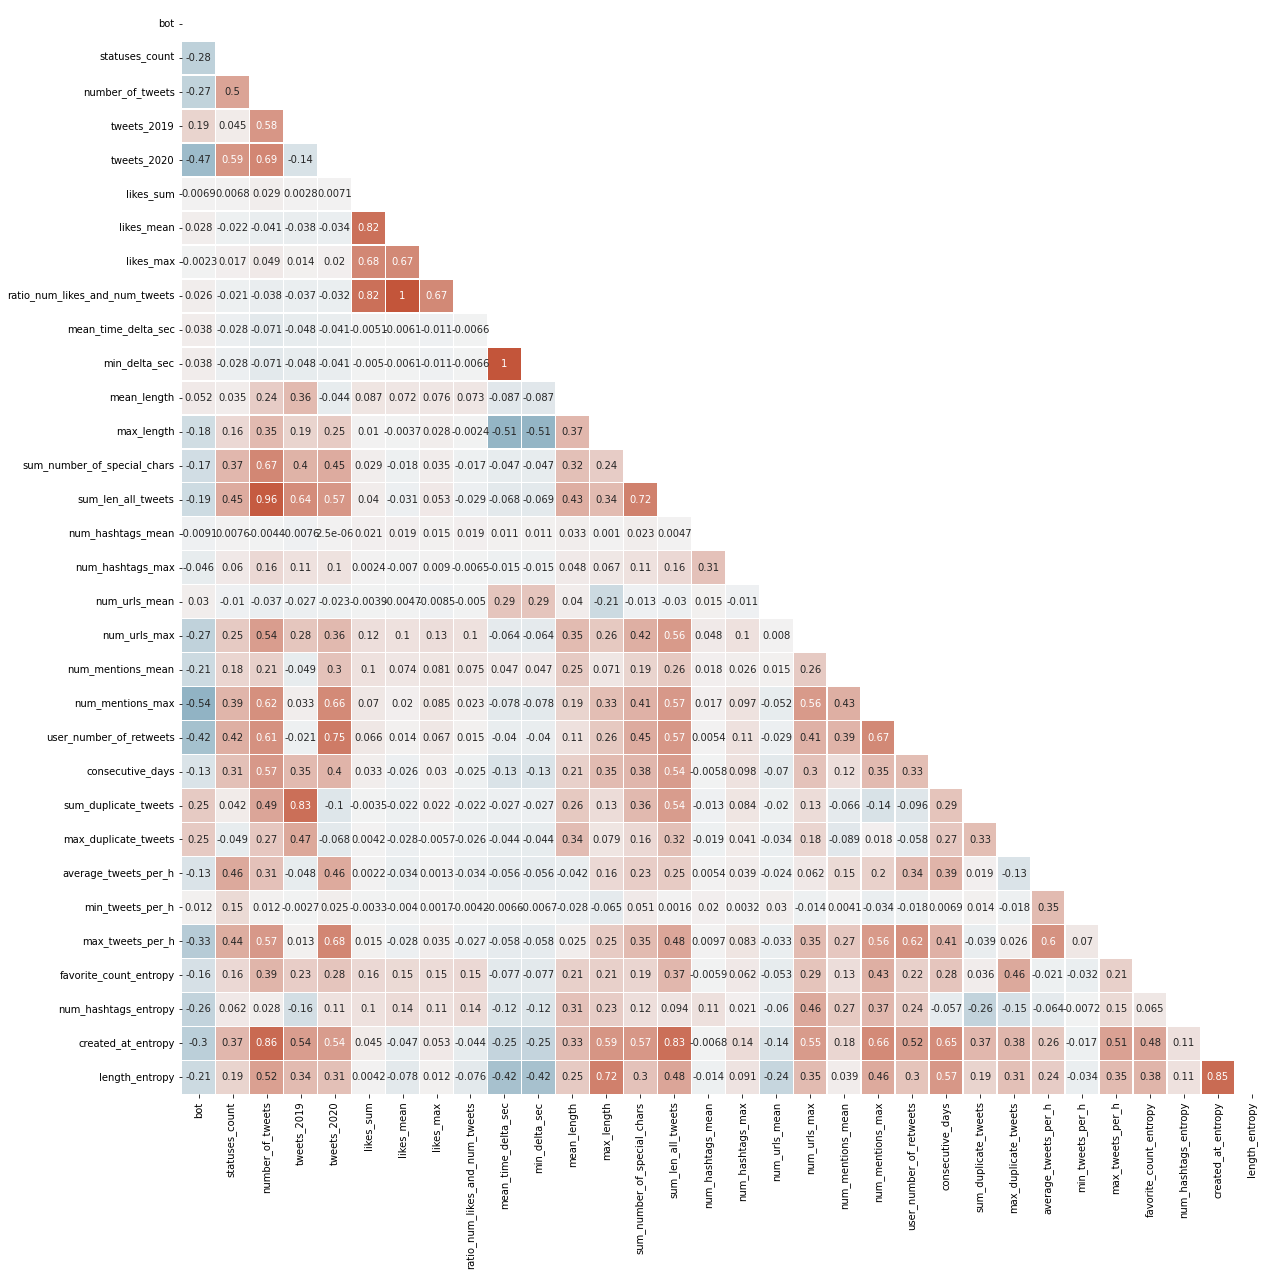

In [ ]:
corr = users_df.drop(columns=['user_id', 'user_id']).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(35, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 10},
            cmap=cmap, center=0, cbar=False,
            square=True, linewidths=.5)
plt.show()

# Saving the merged dataframe in order to be used in future tasks

In [ ]:
%%script false --no-raise-error
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%script false --no-raise-error
path = "/content/drive/MyDrive/Datasets/Data Mining/users_final.parquet.gzip"
users_df.to_parquet(path,
              compression='gzip')

path = "/content/drive/MyDrive/Datasets/Data Mining/tweets_final.parquet.gzip"
tweets_df.to_parquet(path,
              compression='gzip')

# Visualization

In this part of the notebook we will check how the data has changed, how the distributions have comed and if there are still some issues to be fixed. As like the Understanding section this visualization part will focus on the dataframe first and then will see the differences betweet the label bot & non.

## Basic information

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         11508 non-null  int64         
 1   name                            11508 non-null  string        
 2   lang                            11508 non-null  object        
 3   bot                             11508 non-null  int64         
 4   subscription_date               11508 non-null  datetime64[ns]
 5   statuses_count                  11508 non-null  float64       
 6   number_of_tweets                11508 non-null  int64         
 7   tweets_2019                     11508 non-null  int64         
 8   tweets_2020                     11508 non-null  int64         
 9   likes_sum                       11508 non-null  int64         
 10  likes_mean                      11508 non-null  int64         
 11  li

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10860709 entries, 0 to 10860708
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   user_id         int64         
 2   retweet_count   int64         
 3   reply_count     int64         
 4   favorite_count  int64         
 5   num_hashtags    int64         
 6   num_urls        int64         
 7   num_mentions    int64         
 8   created_at      datetime64[ns]
 9   text            string        
 10  is_retweet      boolean       
 11  length          Int64         
dtypes: Int64(1), boolean(1), datetime64[ns](1), int64(8), string(1)
memory usage: 942.5 MB


In [ ]:
for col in users_df.columns:
  print(f"{col} have NaN: {users_df[col].isna().values.any()} : {users_df[col].isna().sum()}")  

user_id have NaN: False : 0
name have NaN: False : 0
lang have NaN: False : 0
bot have NaN: False : 0
subscription_date have NaN: False : 0
statuses_count have NaN: False : 0
number_of_tweets have NaN: False : 0
tweets_2019 have NaN: False : 0
tweets_2020 have NaN: False : 0
likes_sum have NaN: False : 0
likes_mean have NaN: False : 0
likes_max have NaN: False : 0
ratio_num_likes_and_num_tweets have NaN: False : 0
mean_time_delta_sec have NaN: False : 0
min_delta_sec have NaN: False : 0
mean_length have NaN: False : 0
max_length have NaN: False : 0
sum_number_of_special_chars have NaN: False : 0
sum_len_all_tweets have NaN: False : 0
num_hashtags_mean have NaN: False : 0
num_hashtags_max have NaN: False : 0
num_urls_mean have NaN: False : 0
num_urls_max have NaN: False : 0
num_mentions_mean have NaN: False : 0
num_mentions_max have NaN: False : 0
user_number_of_retweets have NaN: False : 0
consecutive_days have NaN: False : 0
sum_duplicate_tweets have NaN: False : 0
max_duplicate_tweet

In [ ]:
users_df['lang'] = users_df['lang'].astype('string')

## Visualizing data distributions


In this section we will show the distribution of the data by displaying different plots for various features in the dataset.

In [ ]:
color=['#12a0d7']

### Tweets dataset

**Data distribution of numerical fields**

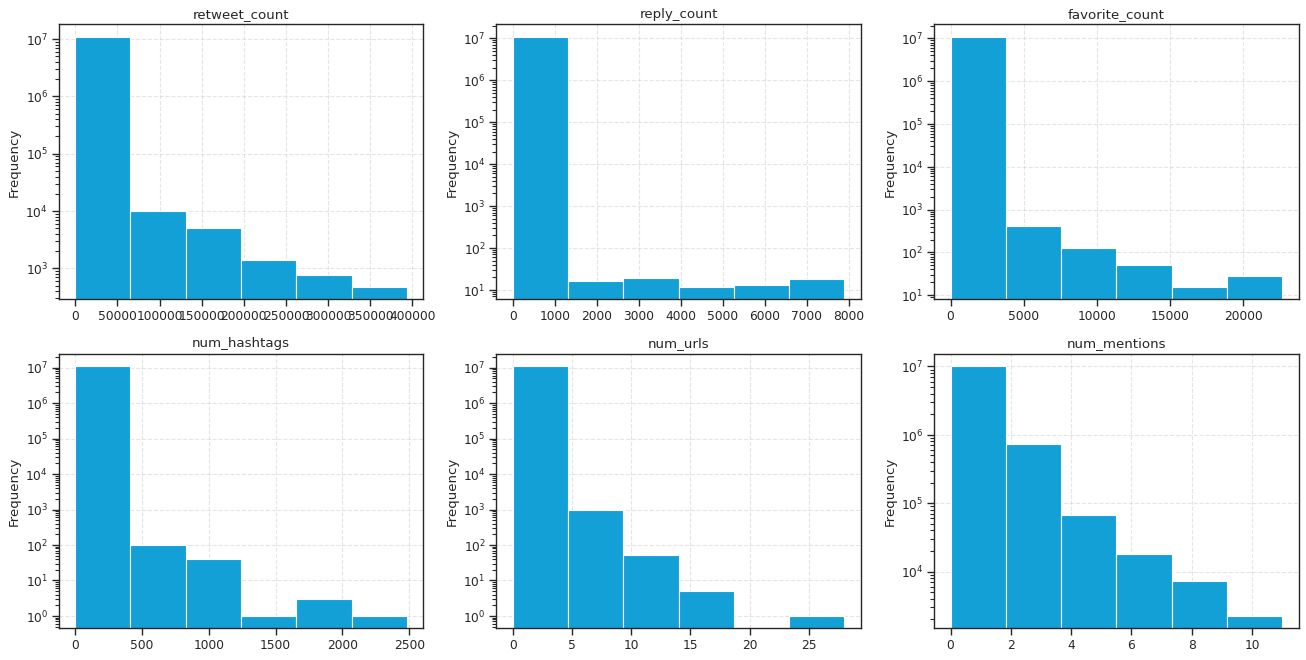

In [ ]:
def multiple_histograms(df: DataFrame, columns, tweets=True):
  nrows=int(len(columns)/3)
  fig, axs = plt.subplots(nrows, 3, sharex=False, sharey=False, dpi=80)
  idx_col = 0

  if tweets:
    fig.set_size_inches(20, 10)
  
  else:
    fig.set_size_inches(20, 40)

  for i in range(nrows):
    for j in range(3):

      col = columns[idx_col]
      idx_col +=1
      
      ax = df[col].plot.hist(bins=6, logy=True,
                                    align='mid',title=col,
                                    grid=True,
                                    ax = axs[i, j], color=color)

      ax.grid(axis='both', alpha=0.5, linestyle='--')
   
      
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

multiple_histograms(tweets_df, columns=columns)

It's easy to notice the differences with the old frequency histogram, now the data are less sparse with coherent ranges.

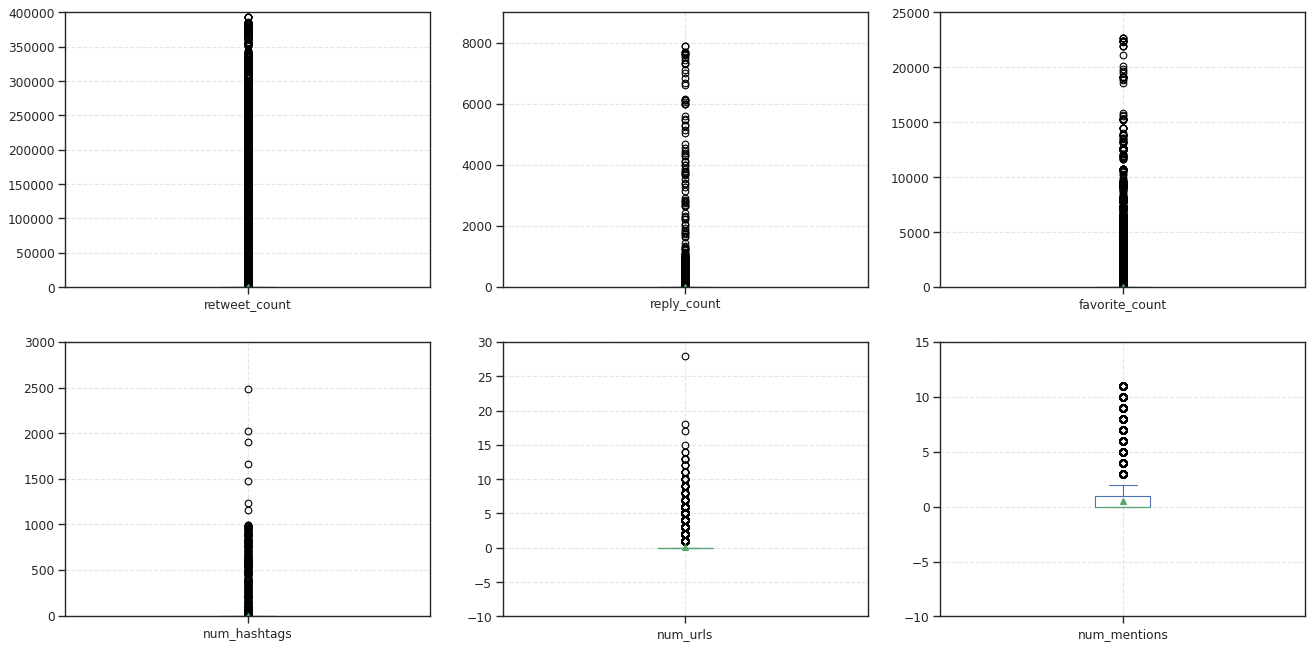

In [ ]:
y_ranges = [400000, 9000, 25000, 3000, 30, 15]

def multiple_boxplots(df: DataFrame, columns, tweets=True):
  if tweets:
    y_ranges = [400000, 9000, 25000, 3000, 30, 15]

  row_numbers = int(len(columns)/3)

  fig, axs = plt.subplots(row_numbers, 3, sharex=False, sharey=False, dpi=80)
  if tweets:
    y_ranges = [400000, 9000, 25000, 3000, 30, 15]
    fig.set_size_inches(20, 10)
  
  else:
    fig.set_size_inches(20, 40)

  idx_col = 0

  for i in range(row_numbers):
    for j in range(3):

      col = columns[idx_col]
      ax = df[col].plot.box(showmeans=True, 
                              grid=True, ax = axs[i, j])
      if tweets:
        ax.set_ylim(-10, y_ranges[idx_col])


      ax.grid(axis='both', alpha=0.5, linestyle='--')
      idx_col +=1

   
      
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

multiple_boxplots(tweets_df, columns=columns)

The same as before applies, here the boxes of the plot contains denser regions, avoiding evident outliers.

**Distribution of created_at**

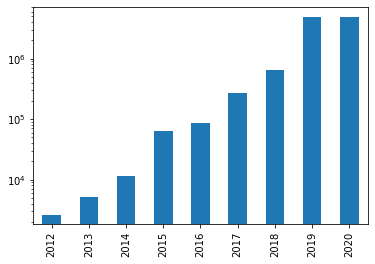

In [ ]:
years = tweets_df['created_at'].dt.year
years.value_counts().sort_index().plot(kind="bar", logy=True)

Now the Tweets have all coherent data ranges. As we can notice the distributions are keeped the same as before, with 2019 and 2020 the major years of data presence.

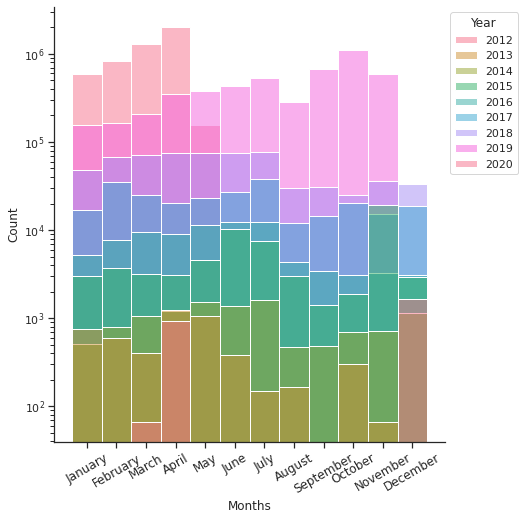

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    tweets_df,
    x=tweets_df['created_at'].dt.month, hue=tweets_df['created_at'].dt.year,
    multiple='layer',
    log_scale=[False, True],
    discrete=True,
    palette='husl'
)

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 30})
plt.show()

del g, ax

**Visualizing the ID through the time**

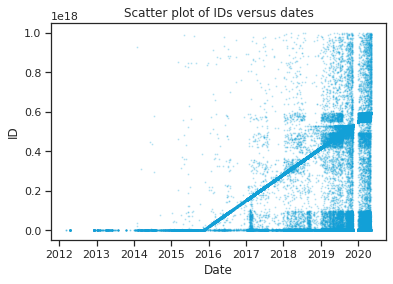

In [ ]:
today = pd.to_datetime("today")     # we set today since there are no tweets later than 2020 with meaningful
twitter_birth = pd.to_datetime("2006-03-21")
mask_datesOK = (tweets_df['created_at'] < today) & (tweets_df['created_at'] > twitter_birth)   

df = tweets_df[mask_datesOK].sample(frac=0.05)

# Create the scatter plot
df.plot(kind='scatter', x='created_at', y='id', color=color, alpha=0.2, s=1)

# Customize the plot
plt.title('Scatter plot of IDs versus dates')
plt.xlabel('Date')
plt.ylabel('ID')

# Display the plot
plt.show()

This is a plot that wants to highlight also the distribution inside the years, as we can notice some months have higher frequency of tweets, this is a normal effect of the data management done. Obviously we are talking about the smaller magnitude of values beeing the less part of the dataset the one with wrong dates. 

### Users dataset

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         11508 non-null  int64         
 1   name                            11508 non-null  string        
 2   lang                            11508 non-null  string        
 3   bot                             11508 non-null  int64         
 4   subscription_date               11508 non-null  datetime64[ns]
 5   statuses_count                  11508 non-null  float64       
 6   number_of_tweets                11508 non-null  int64         
 7   tweets_2019                     11508 non-null  int64         
 8   tweets_2020                     11508 non-null  int64         
 9   likes_sum                       11508 non-null  int64         
 10  likes_mean                      11508 non-null  int64         
 11  li

In [ ]:
columns = ['number_of_tweets', 'tweets_2019', 'tweets_2020', 'likes_sum',
       'likes_mean', 'likes_max', 'ratio_num_likes_and_num_tweets',
       'mean_time_delta_sec', 'min_delta_sec', 'mean_length', 'max_length',
       'sum_number_of_special_chars', 'sum_len_all_tweets',
       'num_hashtags_mean', 'num_hashtags_max', 'num_urls_mean',
       'num_urls_max', 'num_mentions_mean', 'num_mentions_max',
       'user_number_of_retweets', 'consecutive_days', 'sum_duplicate_tweets',
       'max_duplicate_tweets', 'average_tweets_per_h', 'min_tweets_per_h',
       'max_tweets_per_h', 'favorite_count_entropy', 'num_hashtags_entropy',
       'created_at_entropy', 'length_entropy']


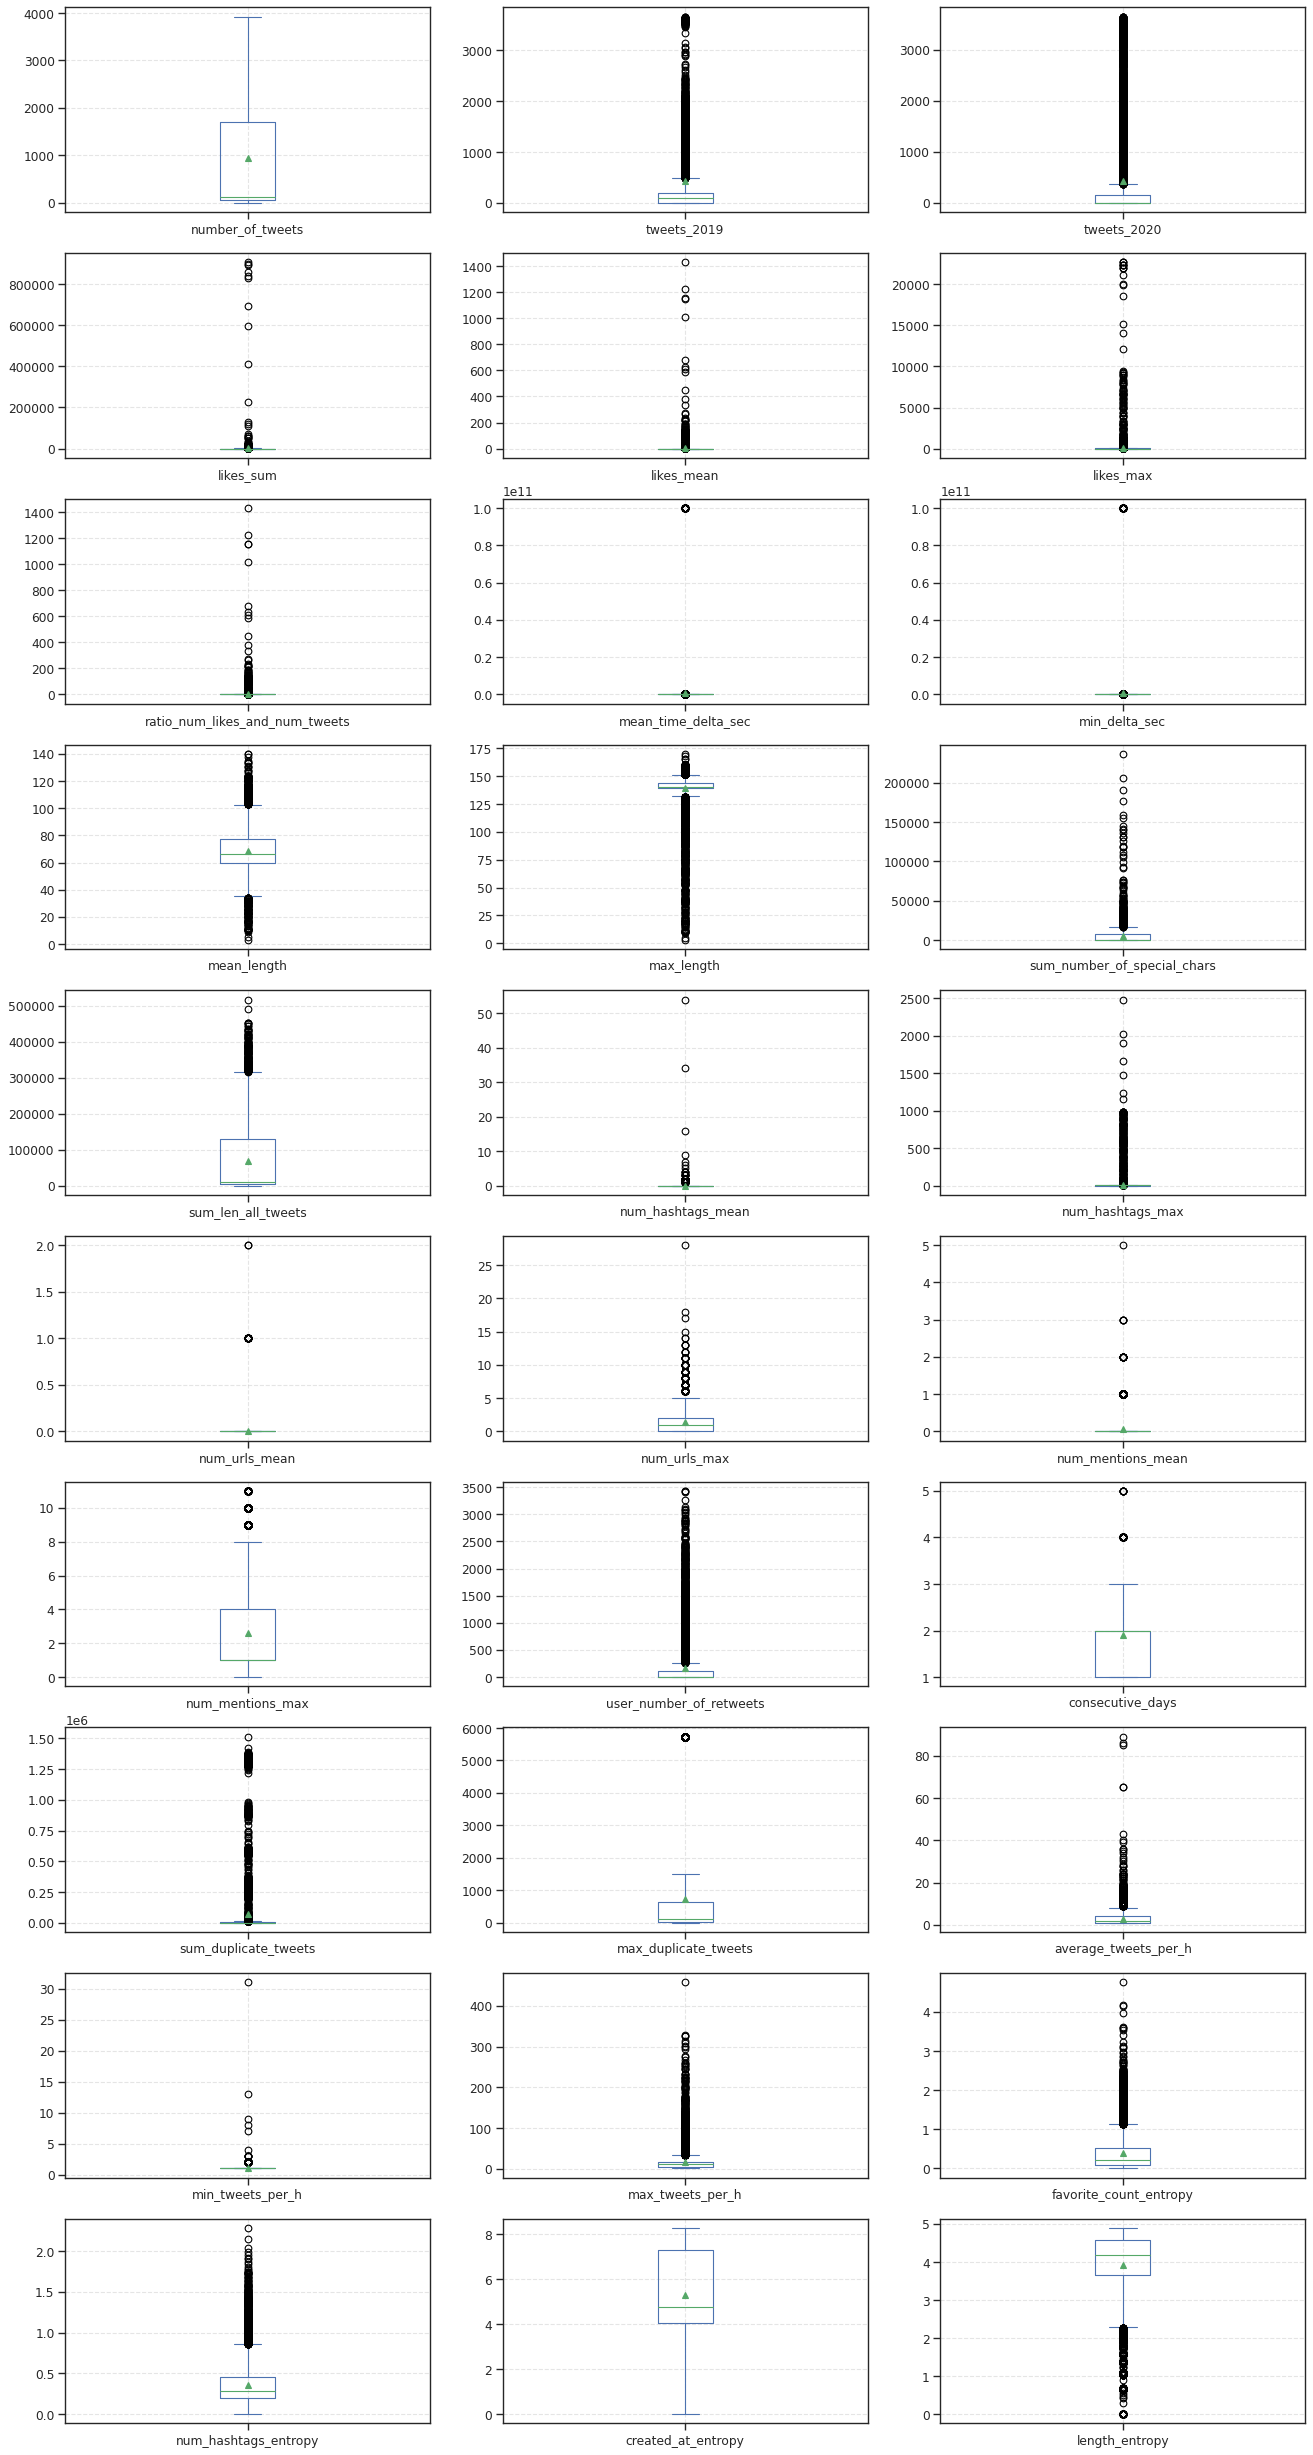

In [ ]:
multiple_boxplots(users_df, columns=columns, tweets=False)

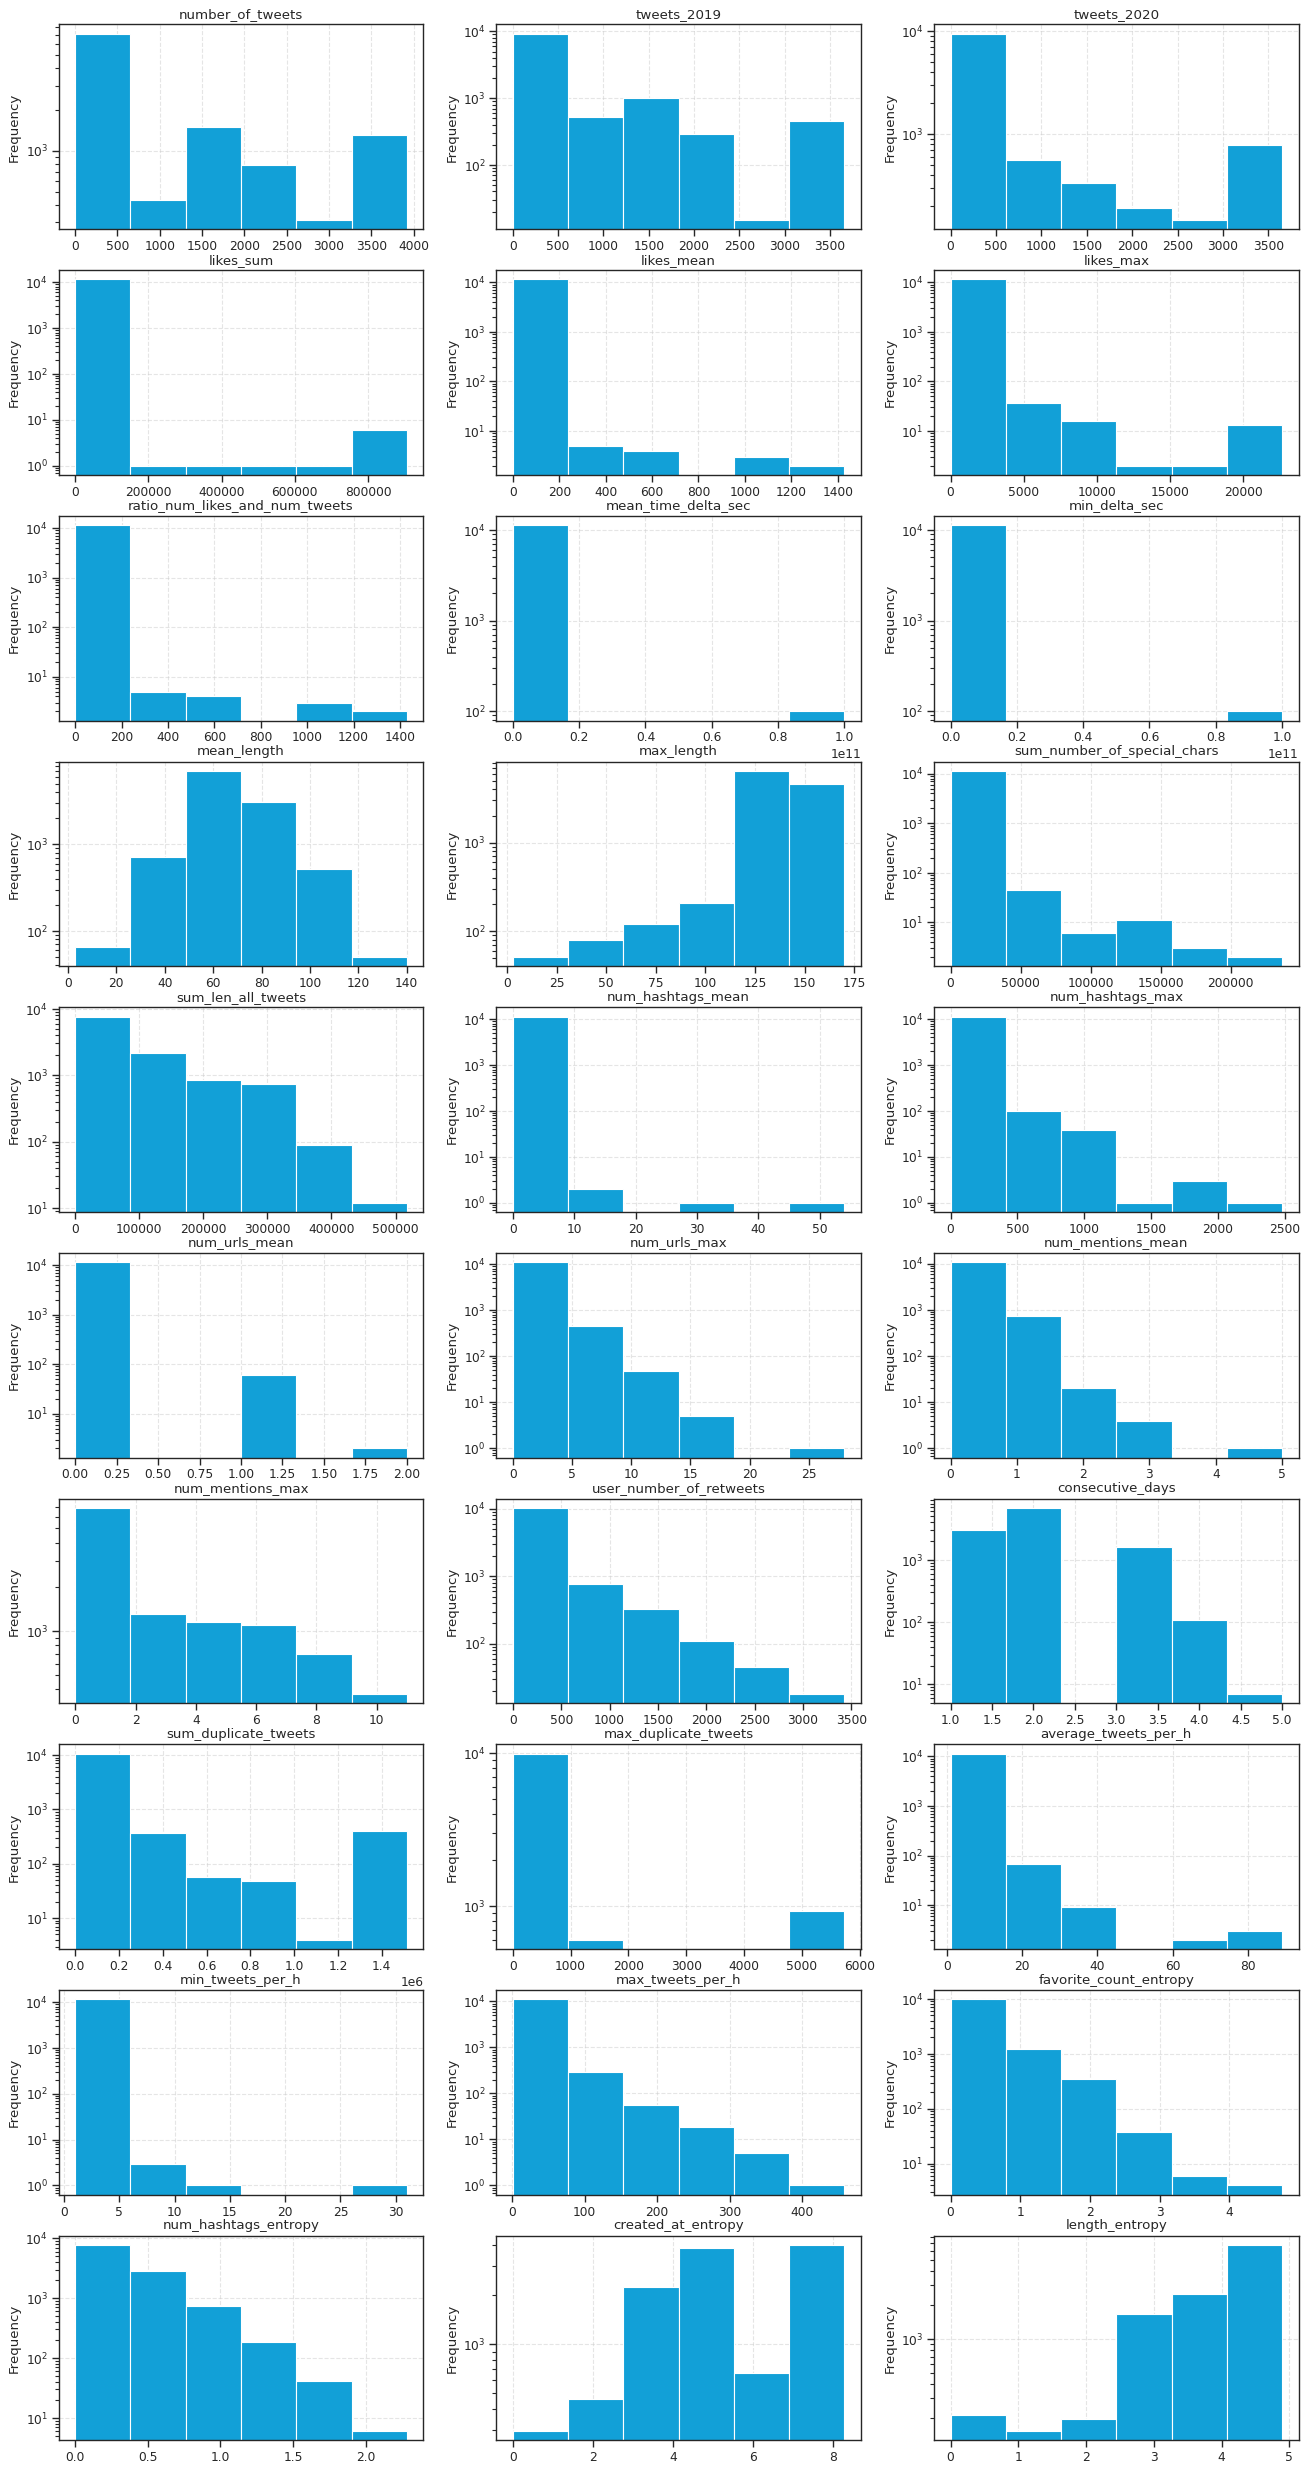

In [ ]:
multiple_histograms(users_df, columns=columns, tweets=False)

**Distribution of created_at**

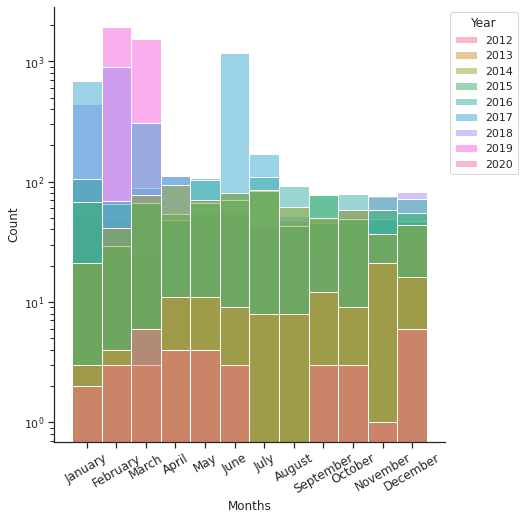

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)


# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    tweets_df,
    x=users_df['subscription_date'].dt.month, hue=users_df['subscription_date'].dt.year,
    multiple='layer',
    log_scale=[False, True],
    discrete=True,
    palette='husl'
)

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 30})
plt.show()

del g, ax

**Distribution of languages**

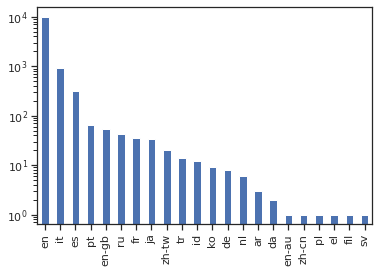

In [ ]:
users_df['lang'].value_counts().plot(kind='bar', logy=True)
plt.show()

It can be that *en* has become even higher in the presence of data, flatting this feature, but now the tweets owner have a coherent language assigned.

**Distribution of statuses count**

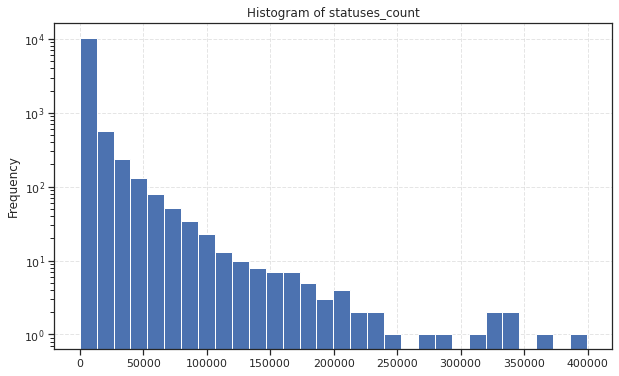

In [ ]:
ax = users_df['statuses_count'].plot.hist(bins=30, logy=True, 
                                           align='mid',title="Histogram of statuses_count",
                                           figsize=(10,6), grid=True)


ax.grid(axis='both', alpha=0.5, linestyle='--')

del ax

Now the number of tweets written per user is coherent with the data precent in the dataframe.

## Visualizing data distributions by differentiating bots and non-bots.


### Languages of actual users and bot

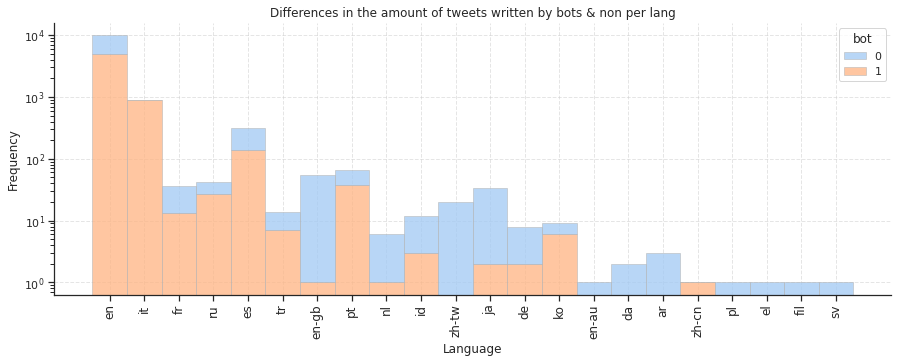

In [ ]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    users_df,
    x='lang', hue='bot',
    multiple="stack",
    palette=sns.color_palette("pastel",2),
    edgecolor=".7",
    log_scale = [False, True],
    linewidth=.5,
    stat='count',
).set(title='Differences in the amount of tweets written by bots & non per lang')
ax.set_ylabel("Frequency")
ax.set_xlabel("Language")
ax.grid(axis='both', alpha=0.5, linestyle='--')
ax.set_xticklabels([lang for lang in users_df['lang'].unique()],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 90})
plt.show()

del f, ax

It's easy to notice the majority of bot beeing in the languages of the upper part of the world.

### Percentage of the number of user: Bot vs No-Bot

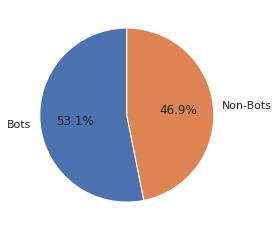

In [ ]:
bots = users_df[users_df['bot'] == 1]
non_bots = users_df[users_df['bot'] == 0]
labels = 'Bots', 'Non-Bots'
sizes = [len(bots), len(non_bots)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

### Percentage of the number of tweet :  Bot vs No-Bot

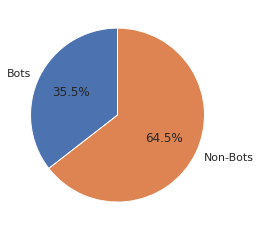

In [ ]:
bots = users_df[users_df['bot'] == 1]
non_bots = users_df[users_df['bot'] == 0]

bots_ids = bots['user_id'].to_list()
tweets_of_bots = tweets_df[tweets_df['user_id'].isin(bots_ids)]

non_bots_ids = non_bots['user_id'].to_list()
tweets_of_non_bots = tweets_df[tweets_df['user_id'].isin(non_bots_ids)]

labels = 'Bots', 'Non-Bots'
sizes = [len(tweets_of_bots), len(tweets_of_non_bots)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

### How long are the tweets written by the bots & non-bots?

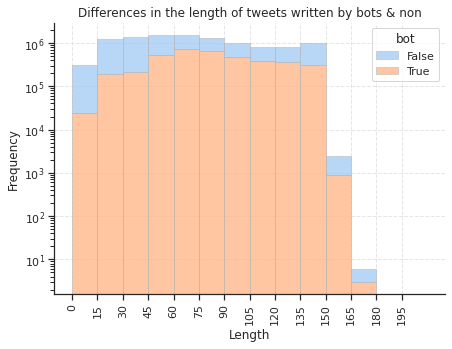

In [ ]:
bot_mask = users_df['bot'] == True
tweets_by_bot = tweets_df
tweets_by_bot['bot'] = tweets_df['user_id'].isin(users_df[bot_mask]['user_id'])

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    tweets_by_bot,
    x=tweets_by_bot['text'].str.len(), hue='bot',
    multiple="stack",
    palette=sns.color_palette("pastel",2),
    edgecolor=".7",
    log_scale = [False, True],
    linewidth=.5,
    stat='count',
    binwidth=15,
    binrange=[0, 200],
).set(title='Differences in the length of tweets written by bots & non')
ax.set_ylabel("Frequency")
ax.set_xlabel("Length")
xticks = np.arange(0, 200, 15)
ax.set_xticks(xticks)
ax.grid(axis='both', alpha=0.5, linestyle='--')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

del f, ax

This histogram is easily comparable with the same in the understanding part, indeed the length is almost the half of before.

### When were the bots created (years)?

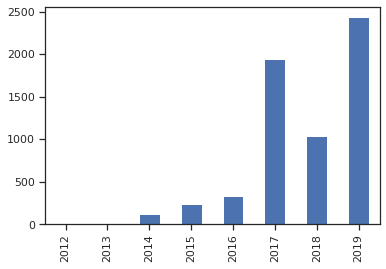

In [ ]:
users_df.loc[users_df["bot"] == True]['subscription_date'].dt.year.value_counts().sort_index().plot(kind="bar")
plt.show()

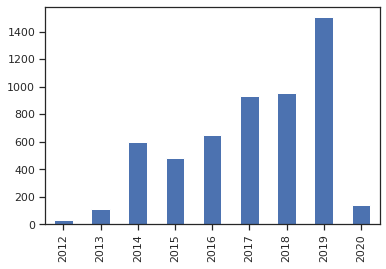

In [ ]:
users_df.loc[users_df["bot"] == False]['subscription_date'].dt.year.value_counts().sort_index().plot(kind="bar")
plt.show()

### Calendar Heatmaps

Here there are plots showing how much sparse the data are in the years, as we can see most of the days have few tweets compared with the spikes in late 2019 and early 2020.

In [ ]:
!pip install calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Calendar heatmap of tweets wrote by bots

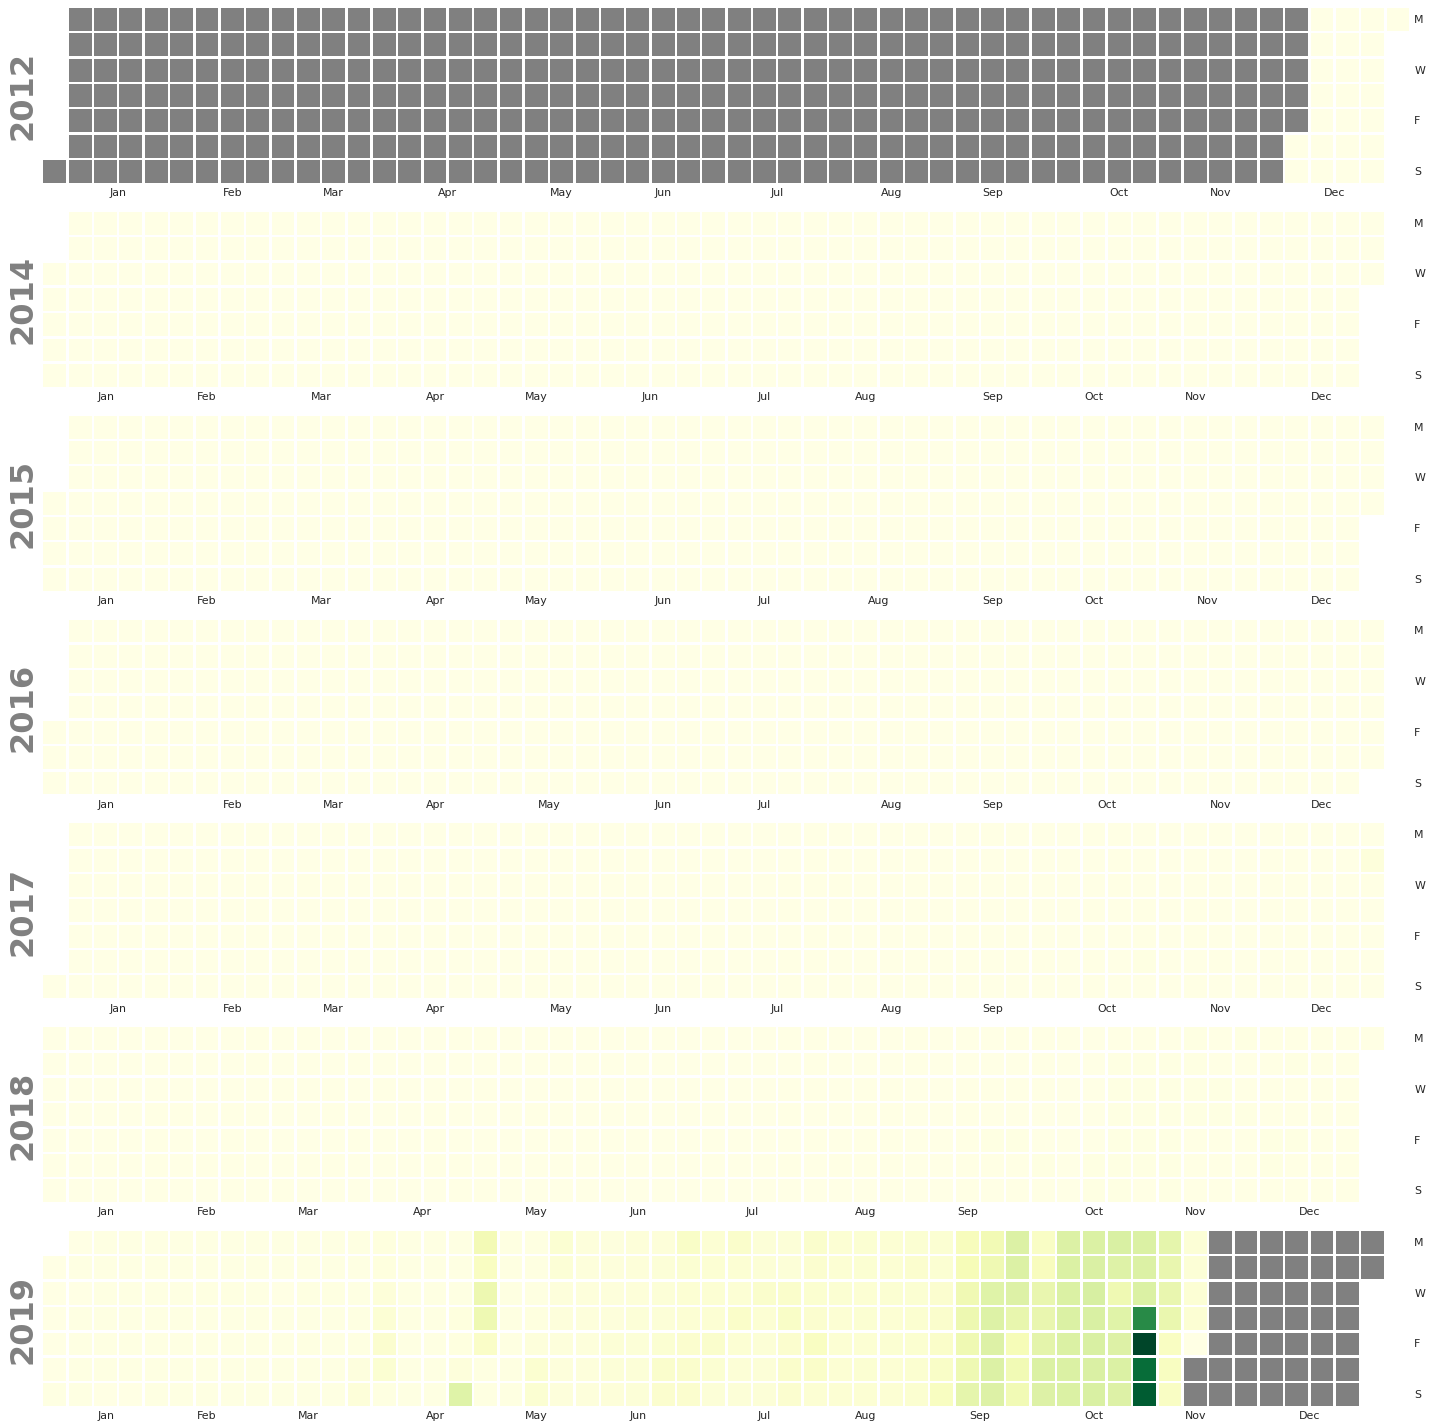

In [ ]:
import calmap

bots = users_df[users_df['bot'] == True]
bots_id = bots['user_id'].to_list()
bots_tweets_df = tweets_df[tweets_df['user_id'].isin(bots_id)]
events = bots_tweets_df['created_at'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=1.5,
                    fig_kws=dict(figsize=(30, 20)))
plt.show()

Calendar heatmap of tweets wrote by non-bots


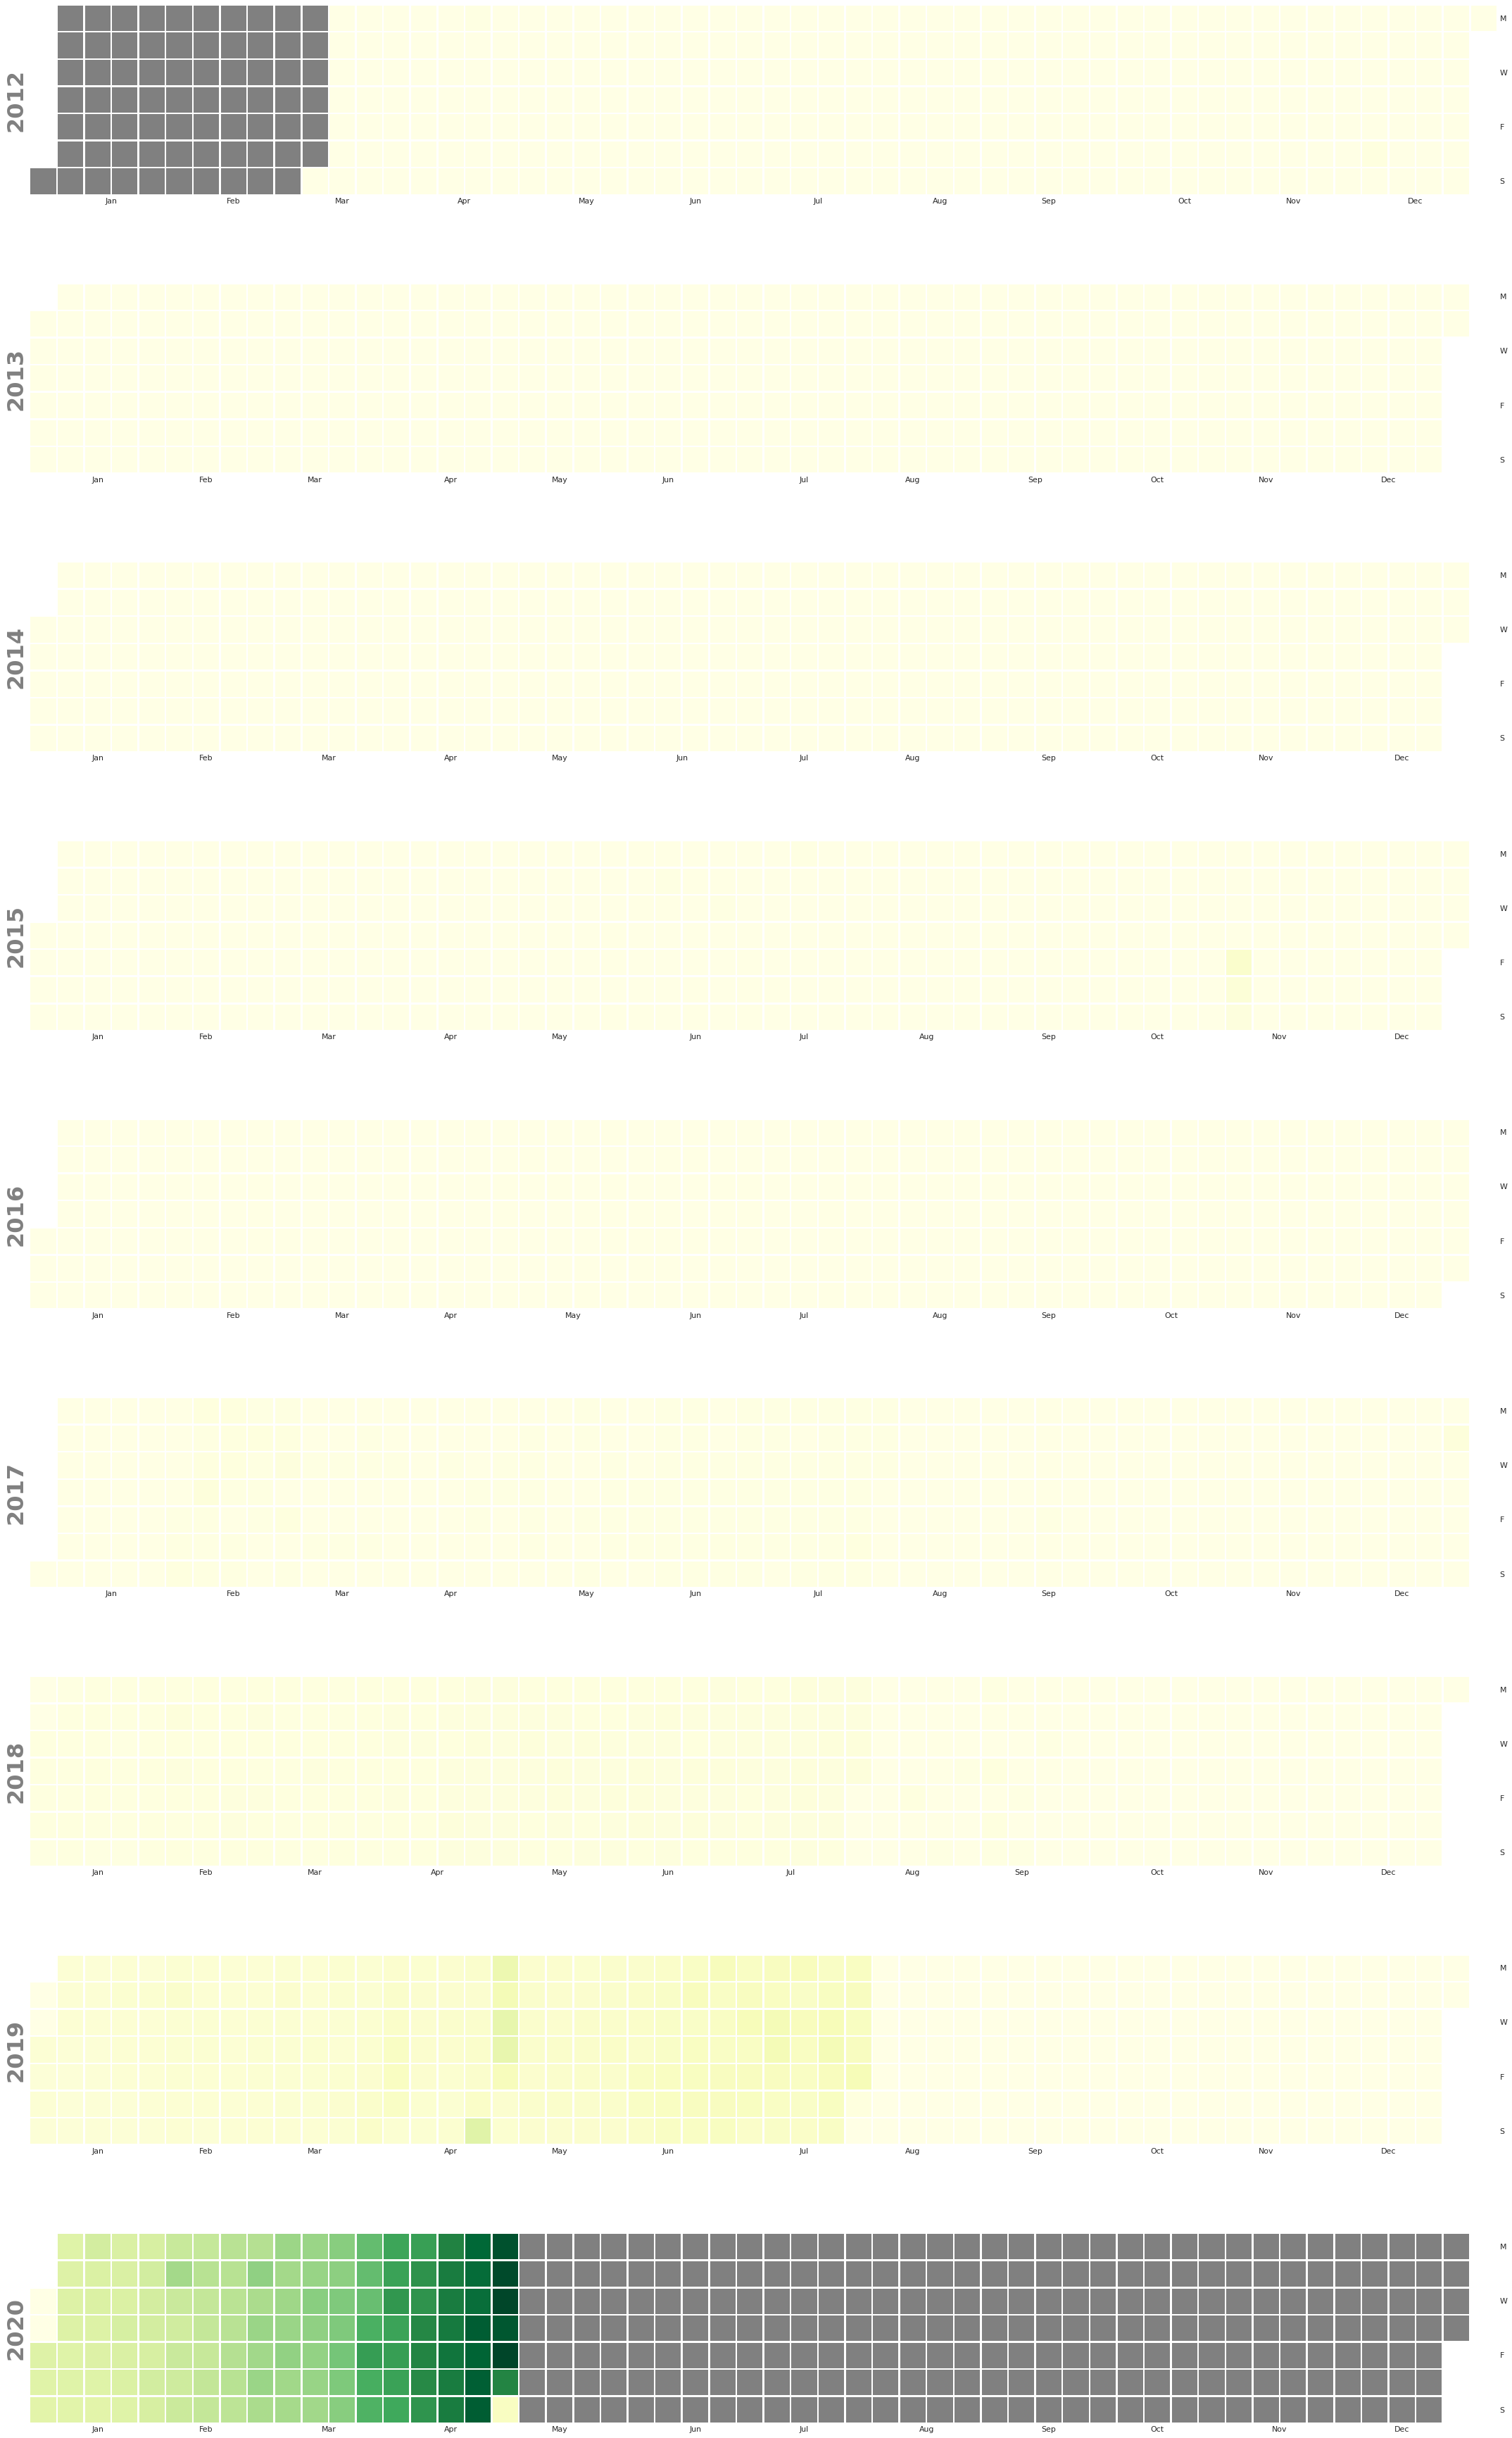

In [ ]:
bots = users_df[users_df['bot'] == False]
bots_id = bots['user_id'].to_list()
bots_tweets_df = tweets_df[tweets_df['user_id'].isin(bots_id)]
events = bots_tweets_df['created_at'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=1.5,
                    fig_kws=dict(figsize=(30, 50)))
plt.show()

Calendar heatmap of creation of bots


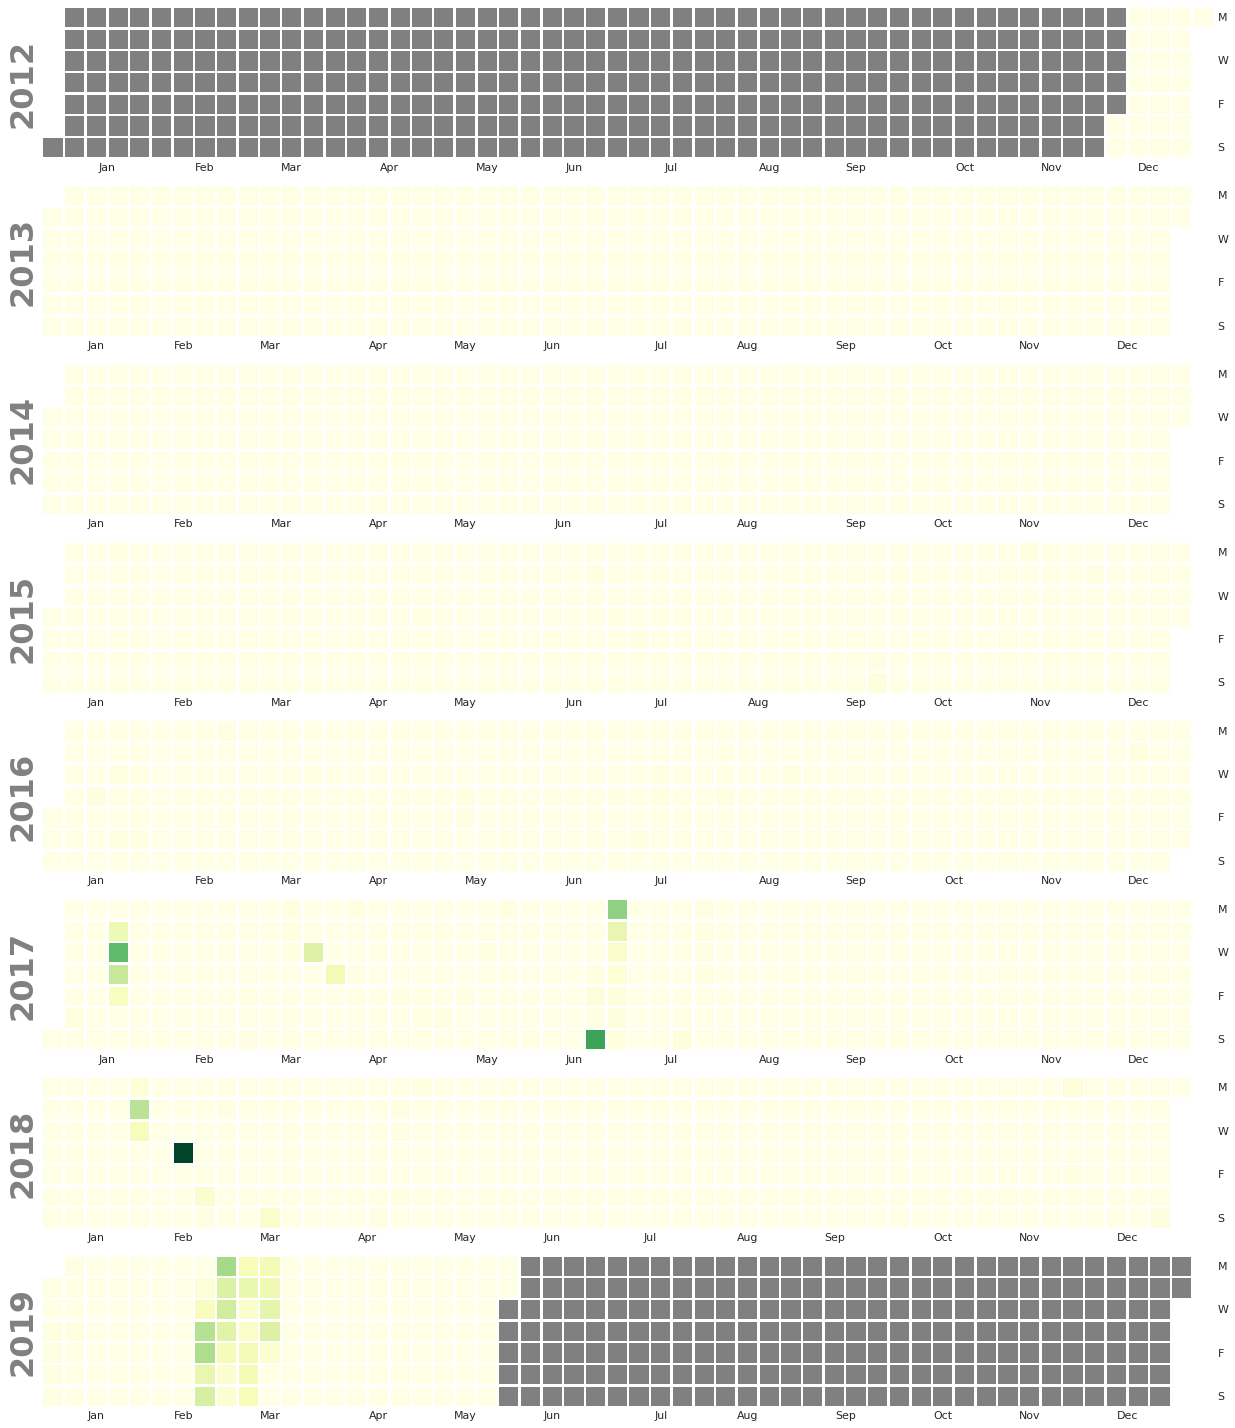

In [ ]:
bots = users_df[users_df['bot'] == True]
events = bots['subscription_date'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=1.5, 
                    fig_kws=dict(figsize=(30, 20)))
plt.show()

Calendar heatmap of creation of non-bots


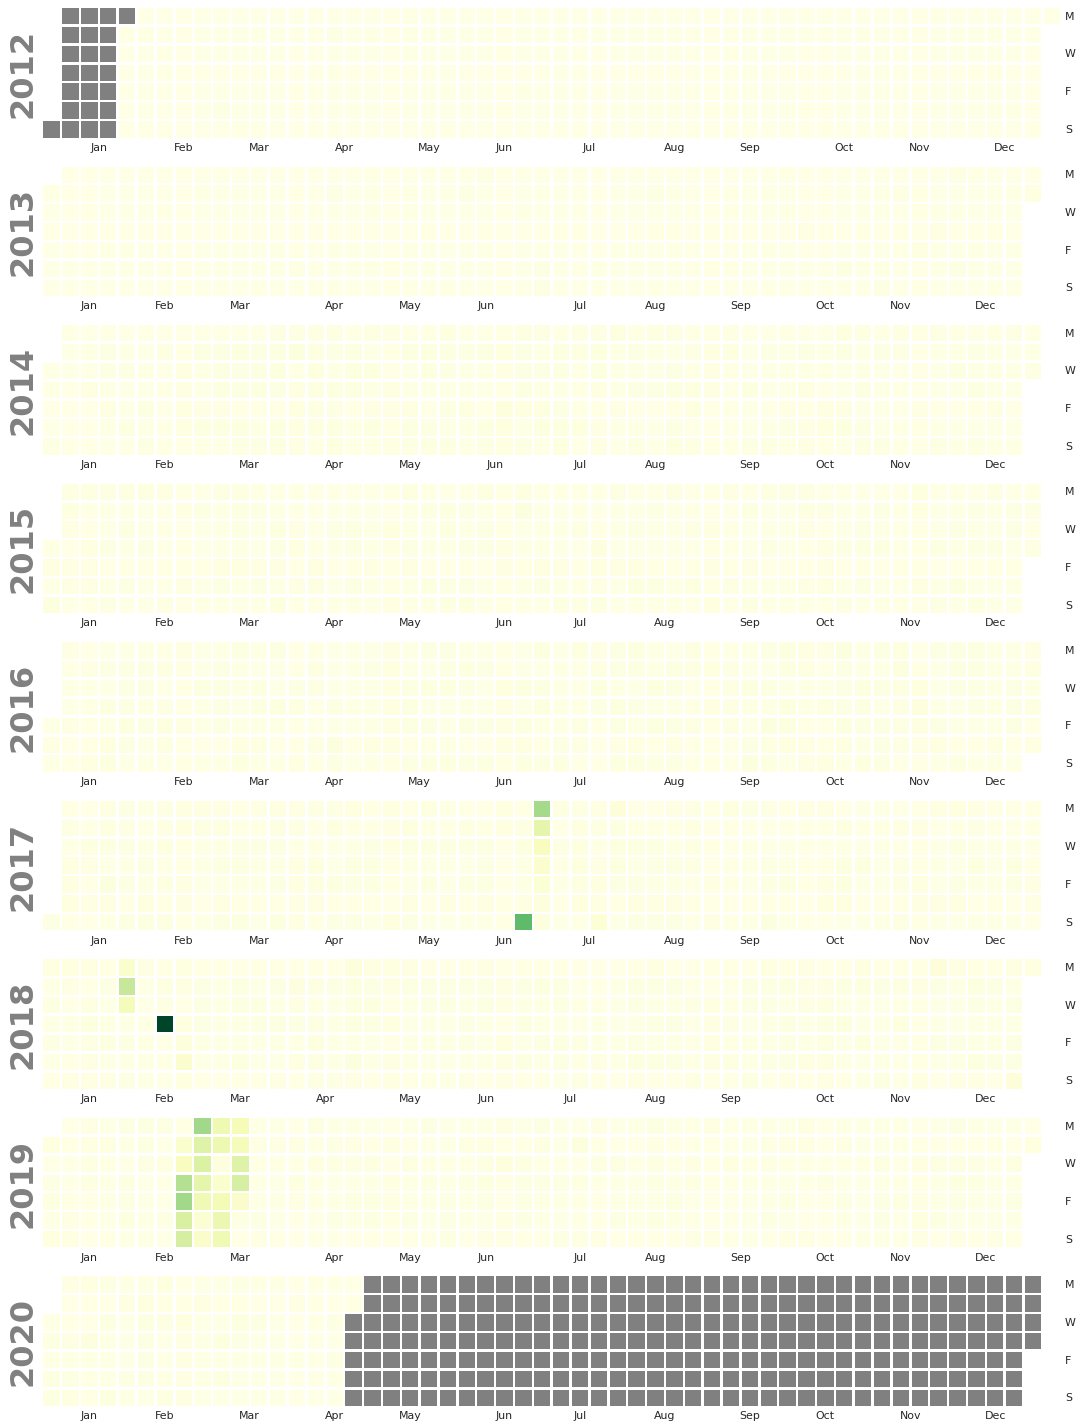

In [ ]:
non_bots = users_df[users_df['bot'] == False]
events = non_bots['subscription_date'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=1.5,
                    fig_kws=dict(figsize=(30, 20)))
plt.show()